# DATAKICKS

## INTRODUCTION 
## Reason behind selecting FIFA as our topic : 
#### Our group, Datakicks will be performing data analysis on the popular video-game FIFA 20. EA’s FIFA is built on an arsenal of real-world data. Professional soccer consists of 800 teams (comprised of 18,000 players) across a variety of countries, and each is represented in-game. Our dataset includes information on players’ background such as country of origin, club team  height, weight, age and position as well as their stats from the games such as number of completed passes and their preferred foot to use while playing. Given this dataset, we are able to not only analyze players information on a national level but on a club level as well within the soccer league industry. 

#### Other than all group members having a liking towards some sport related topic (especially football), it was a chance for us to couple this interest with python skills and develop an ideal dream team. Every other thing then just followed and along the way, we were able to proceed with intensive scraping and cleansing and further develop meaningful and attractive visualizations too (as stated in peer feedback).

#### In simple words, it is an attempt to create a treasure of information and stats for all the FOOTBALL LOVERS ⚽️ !!!!

# Data Scraping 

#### From sofifa.com website using Scrapy and Request objects

# Stepwise implementation of acquiring data:

#### scrapy startproject command was used on terminal to create a project with default files such as items.py, middlewares.py, pipelines.py and settings.py along with a folder named spiders
#### This is where our .py script is present which contains spider named 'fifadatacrawler' to crawl the sofifa.com website
#### Following is the screenshot of the entire code which will make it more clear and concise

In [1]:
from IPython.display import Image
from PIL import Image

## .py script for the spider to crawl the mentioned url and extract data 

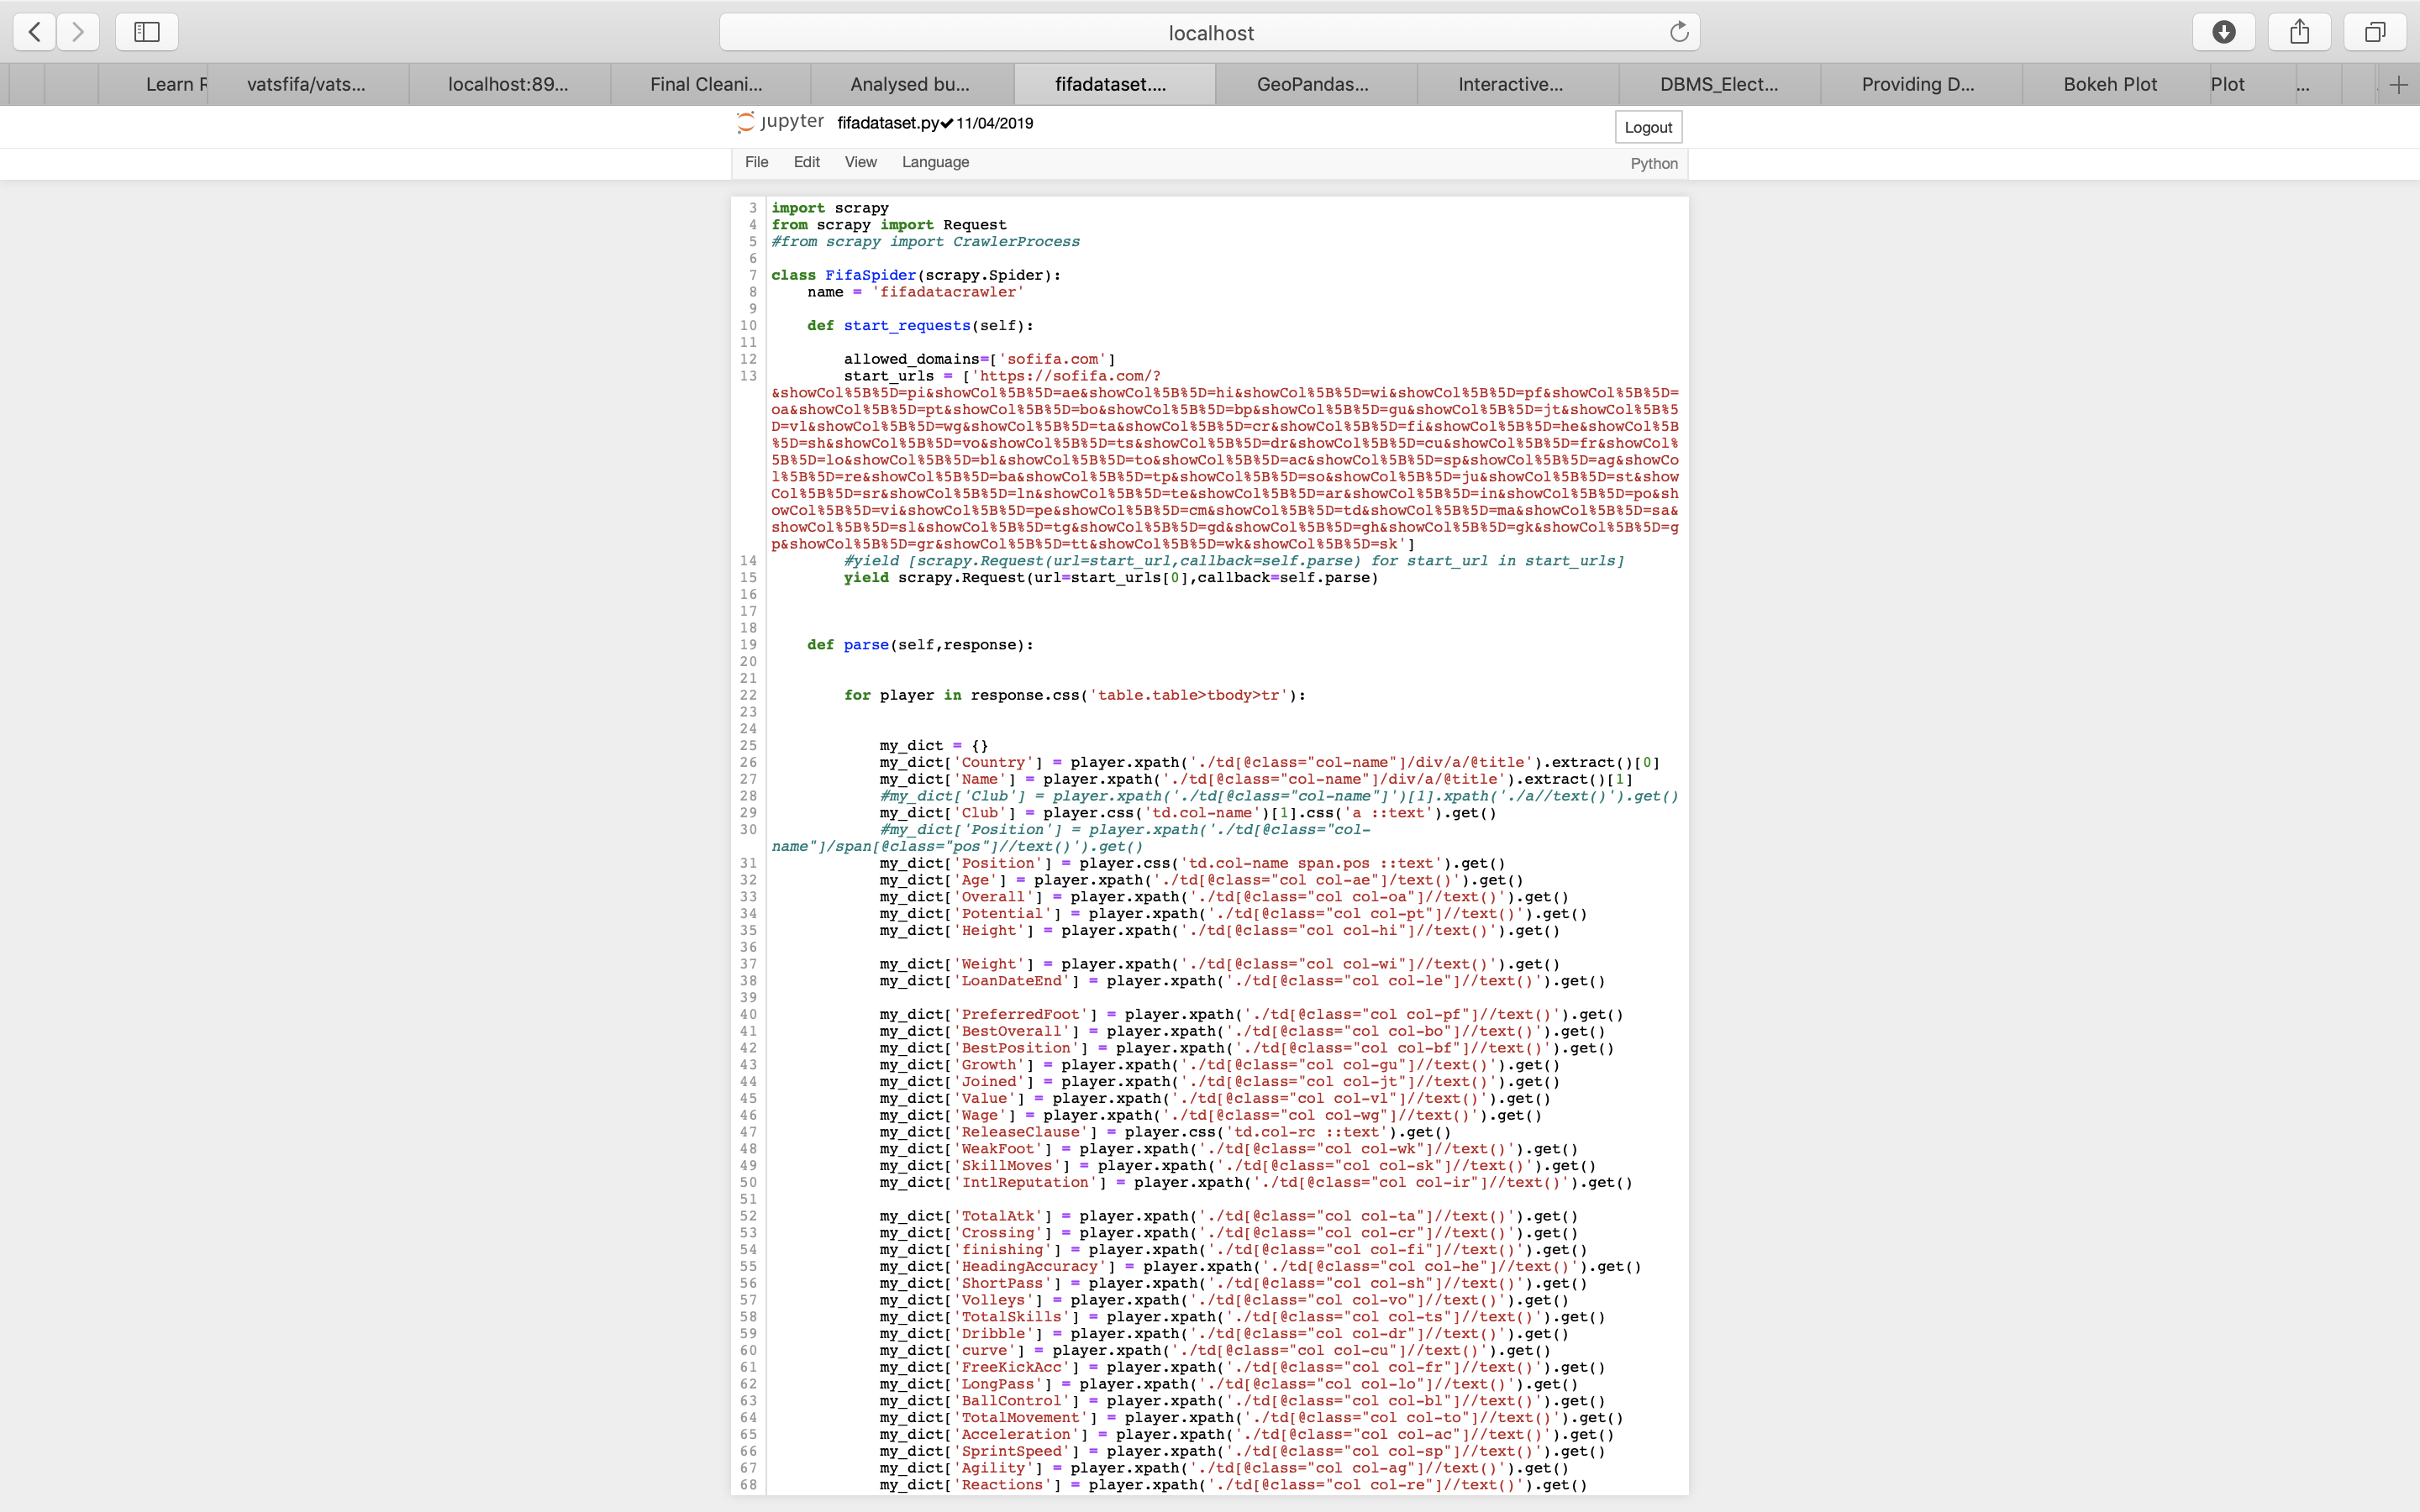

In [2]:
path="/Users/vats/Downloads/1stscraping.PNG"
display(Image.open(path))

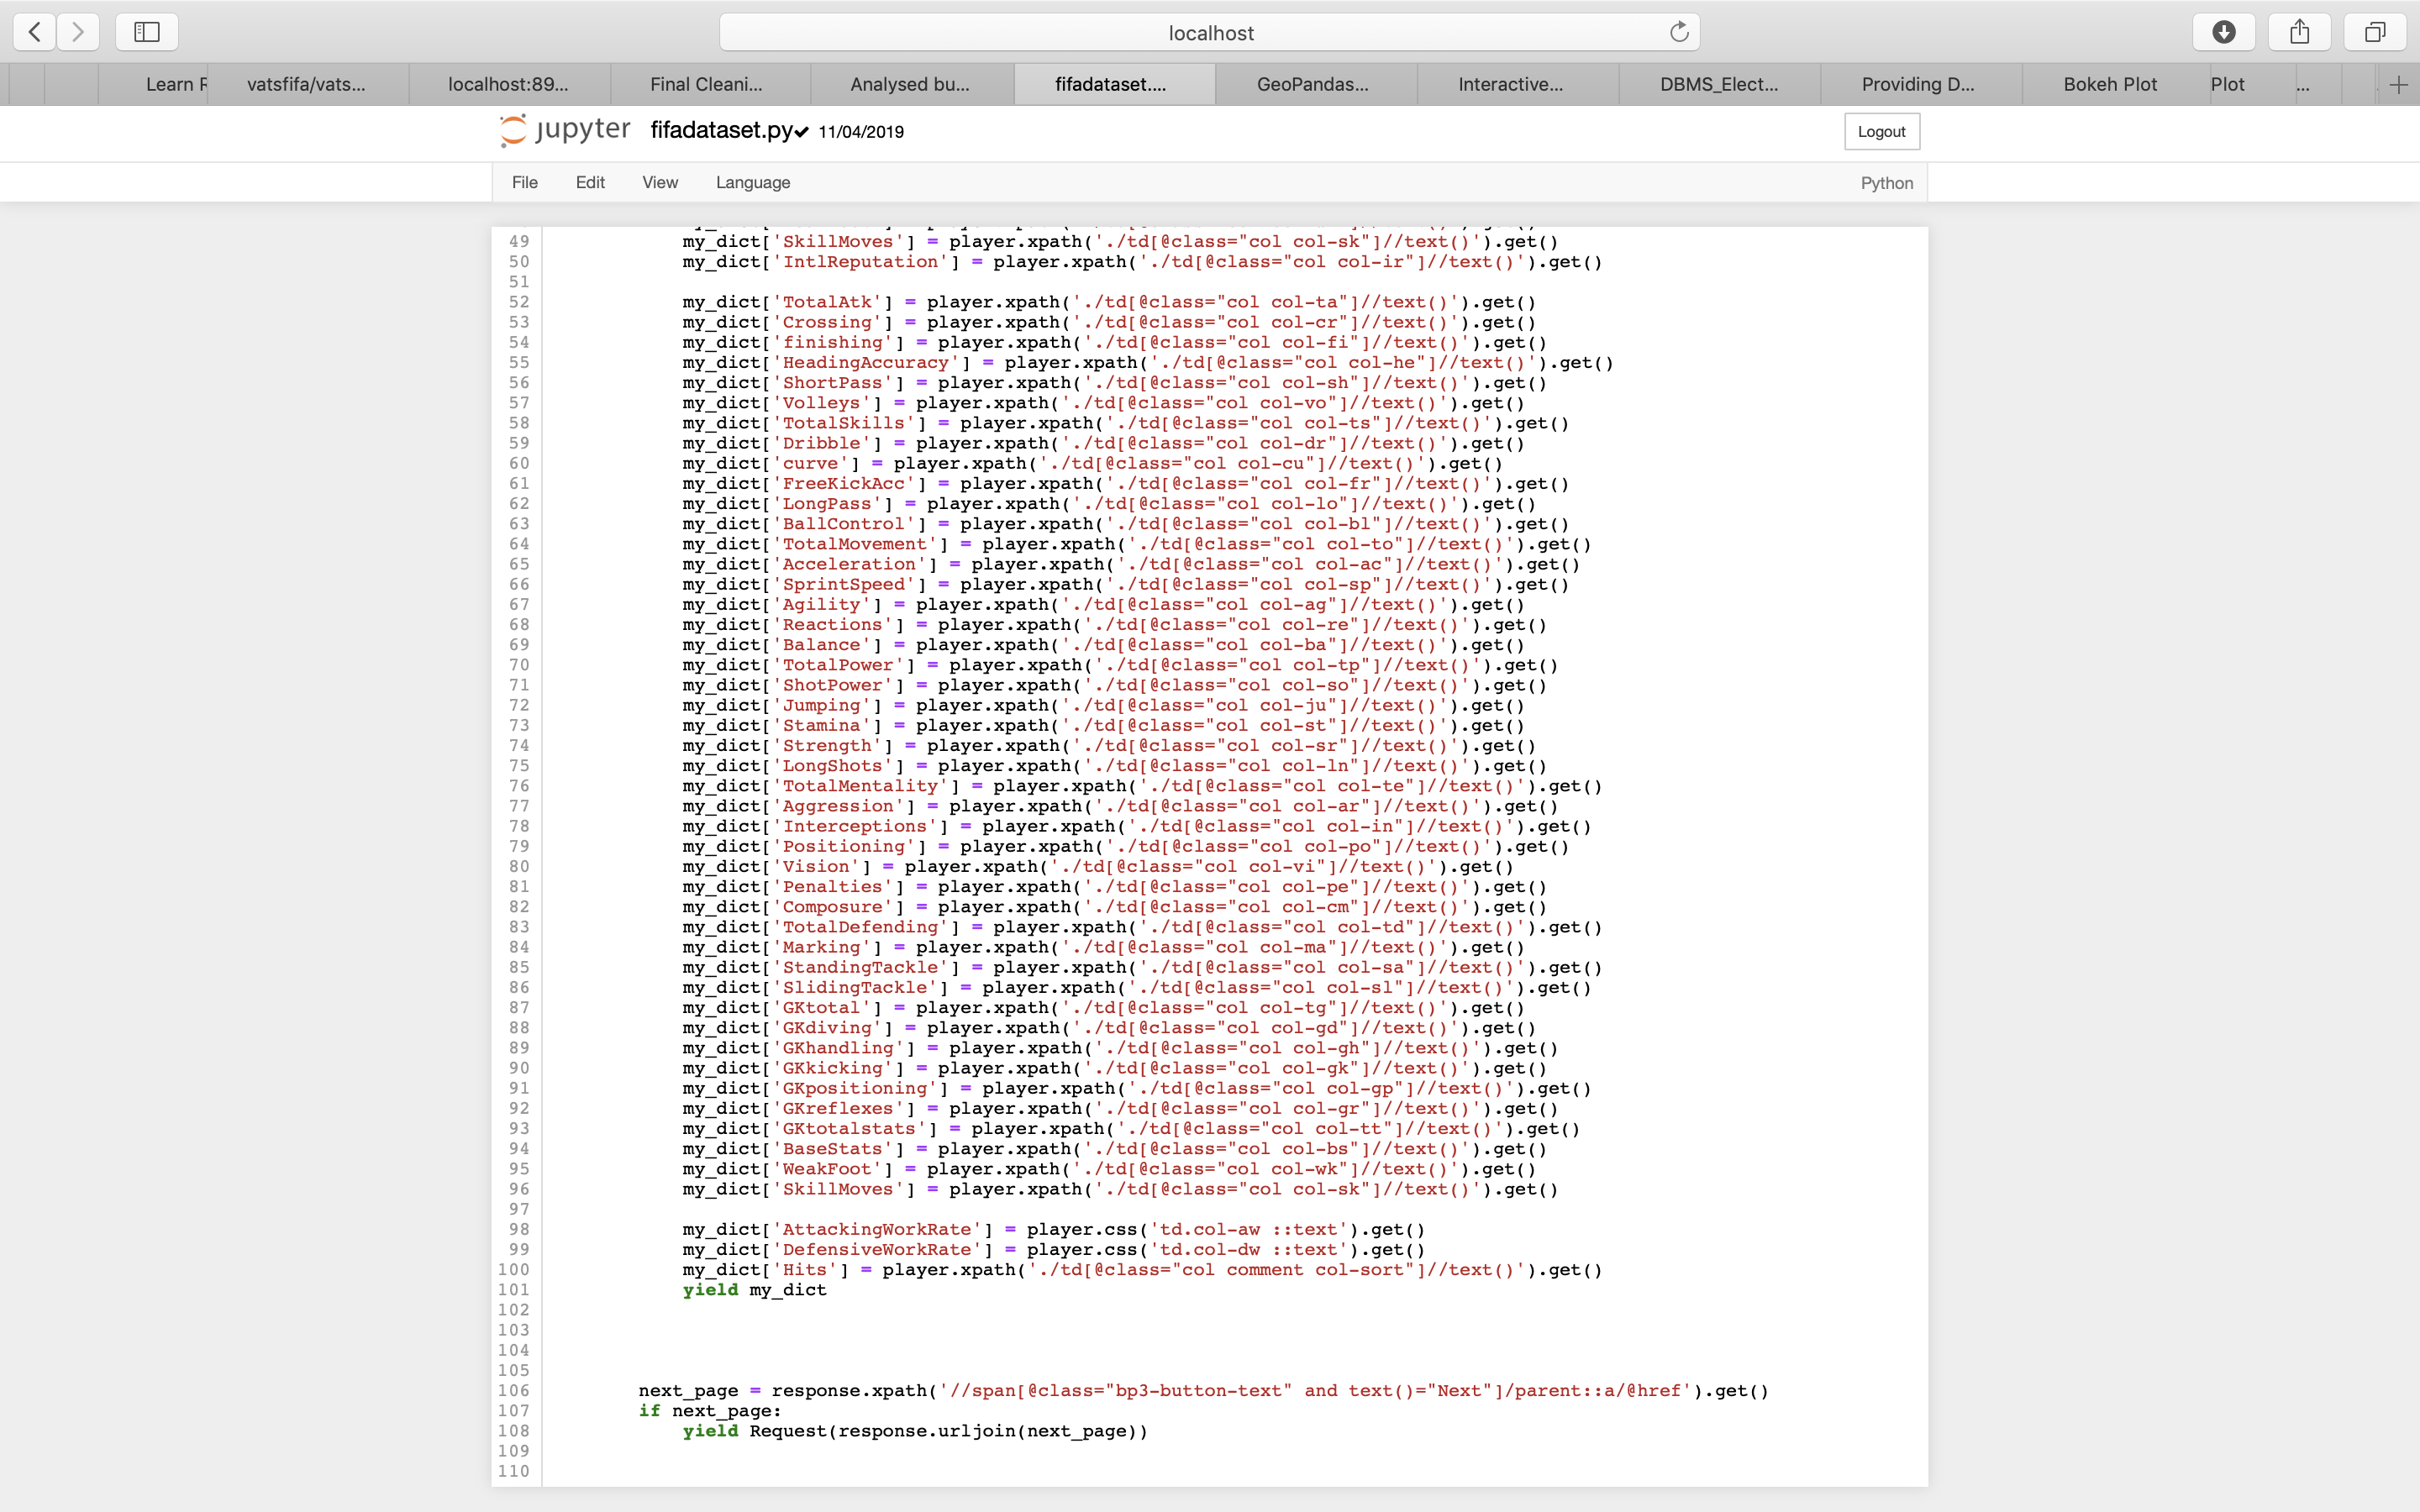

In [3]:
path="/Users/vats/Downloads/2ndscraping.PNG"
display(Image.open(path))

# Code explanantion - keeping it as simple as possible

#### Why used scrapy over BeautifulSoup ? This is because we had the chance to work on BeautifulSoup while in class and even during homework asssignments and hence we decided to tap an unexplored territory and develop more skills.
#### Firstly importing all modules used throughout,  followed by defining class which has the spider named 'fifadatacrawler' which is the heart of our project.
#### start_requests function has list of urls from where the spider can scrape data but in our case it is just one website 'sofifa.com'. It further makes a callback to next function defined within same class named parse.
#### This is the place where we made use of our HTML knowledge of xpath notations and css locators to acquire data on each football player listed on the website.
#### You might see 62 key value pairs getting appended to dictionary in one iteration of for loop where each row of code corresponds to the exact player feature for which data is needed.
#### Last three lines of code is telling the spider to continue to the next webpage and repeat the same process
#### This is how we managed to scrape a huge dataset of 20100 rows and 62 columns which has then been reduced and formatted explained in the Data Cleaning section of this ipynb.

### Screenshots of commands on terminal for spider to start crawling. 

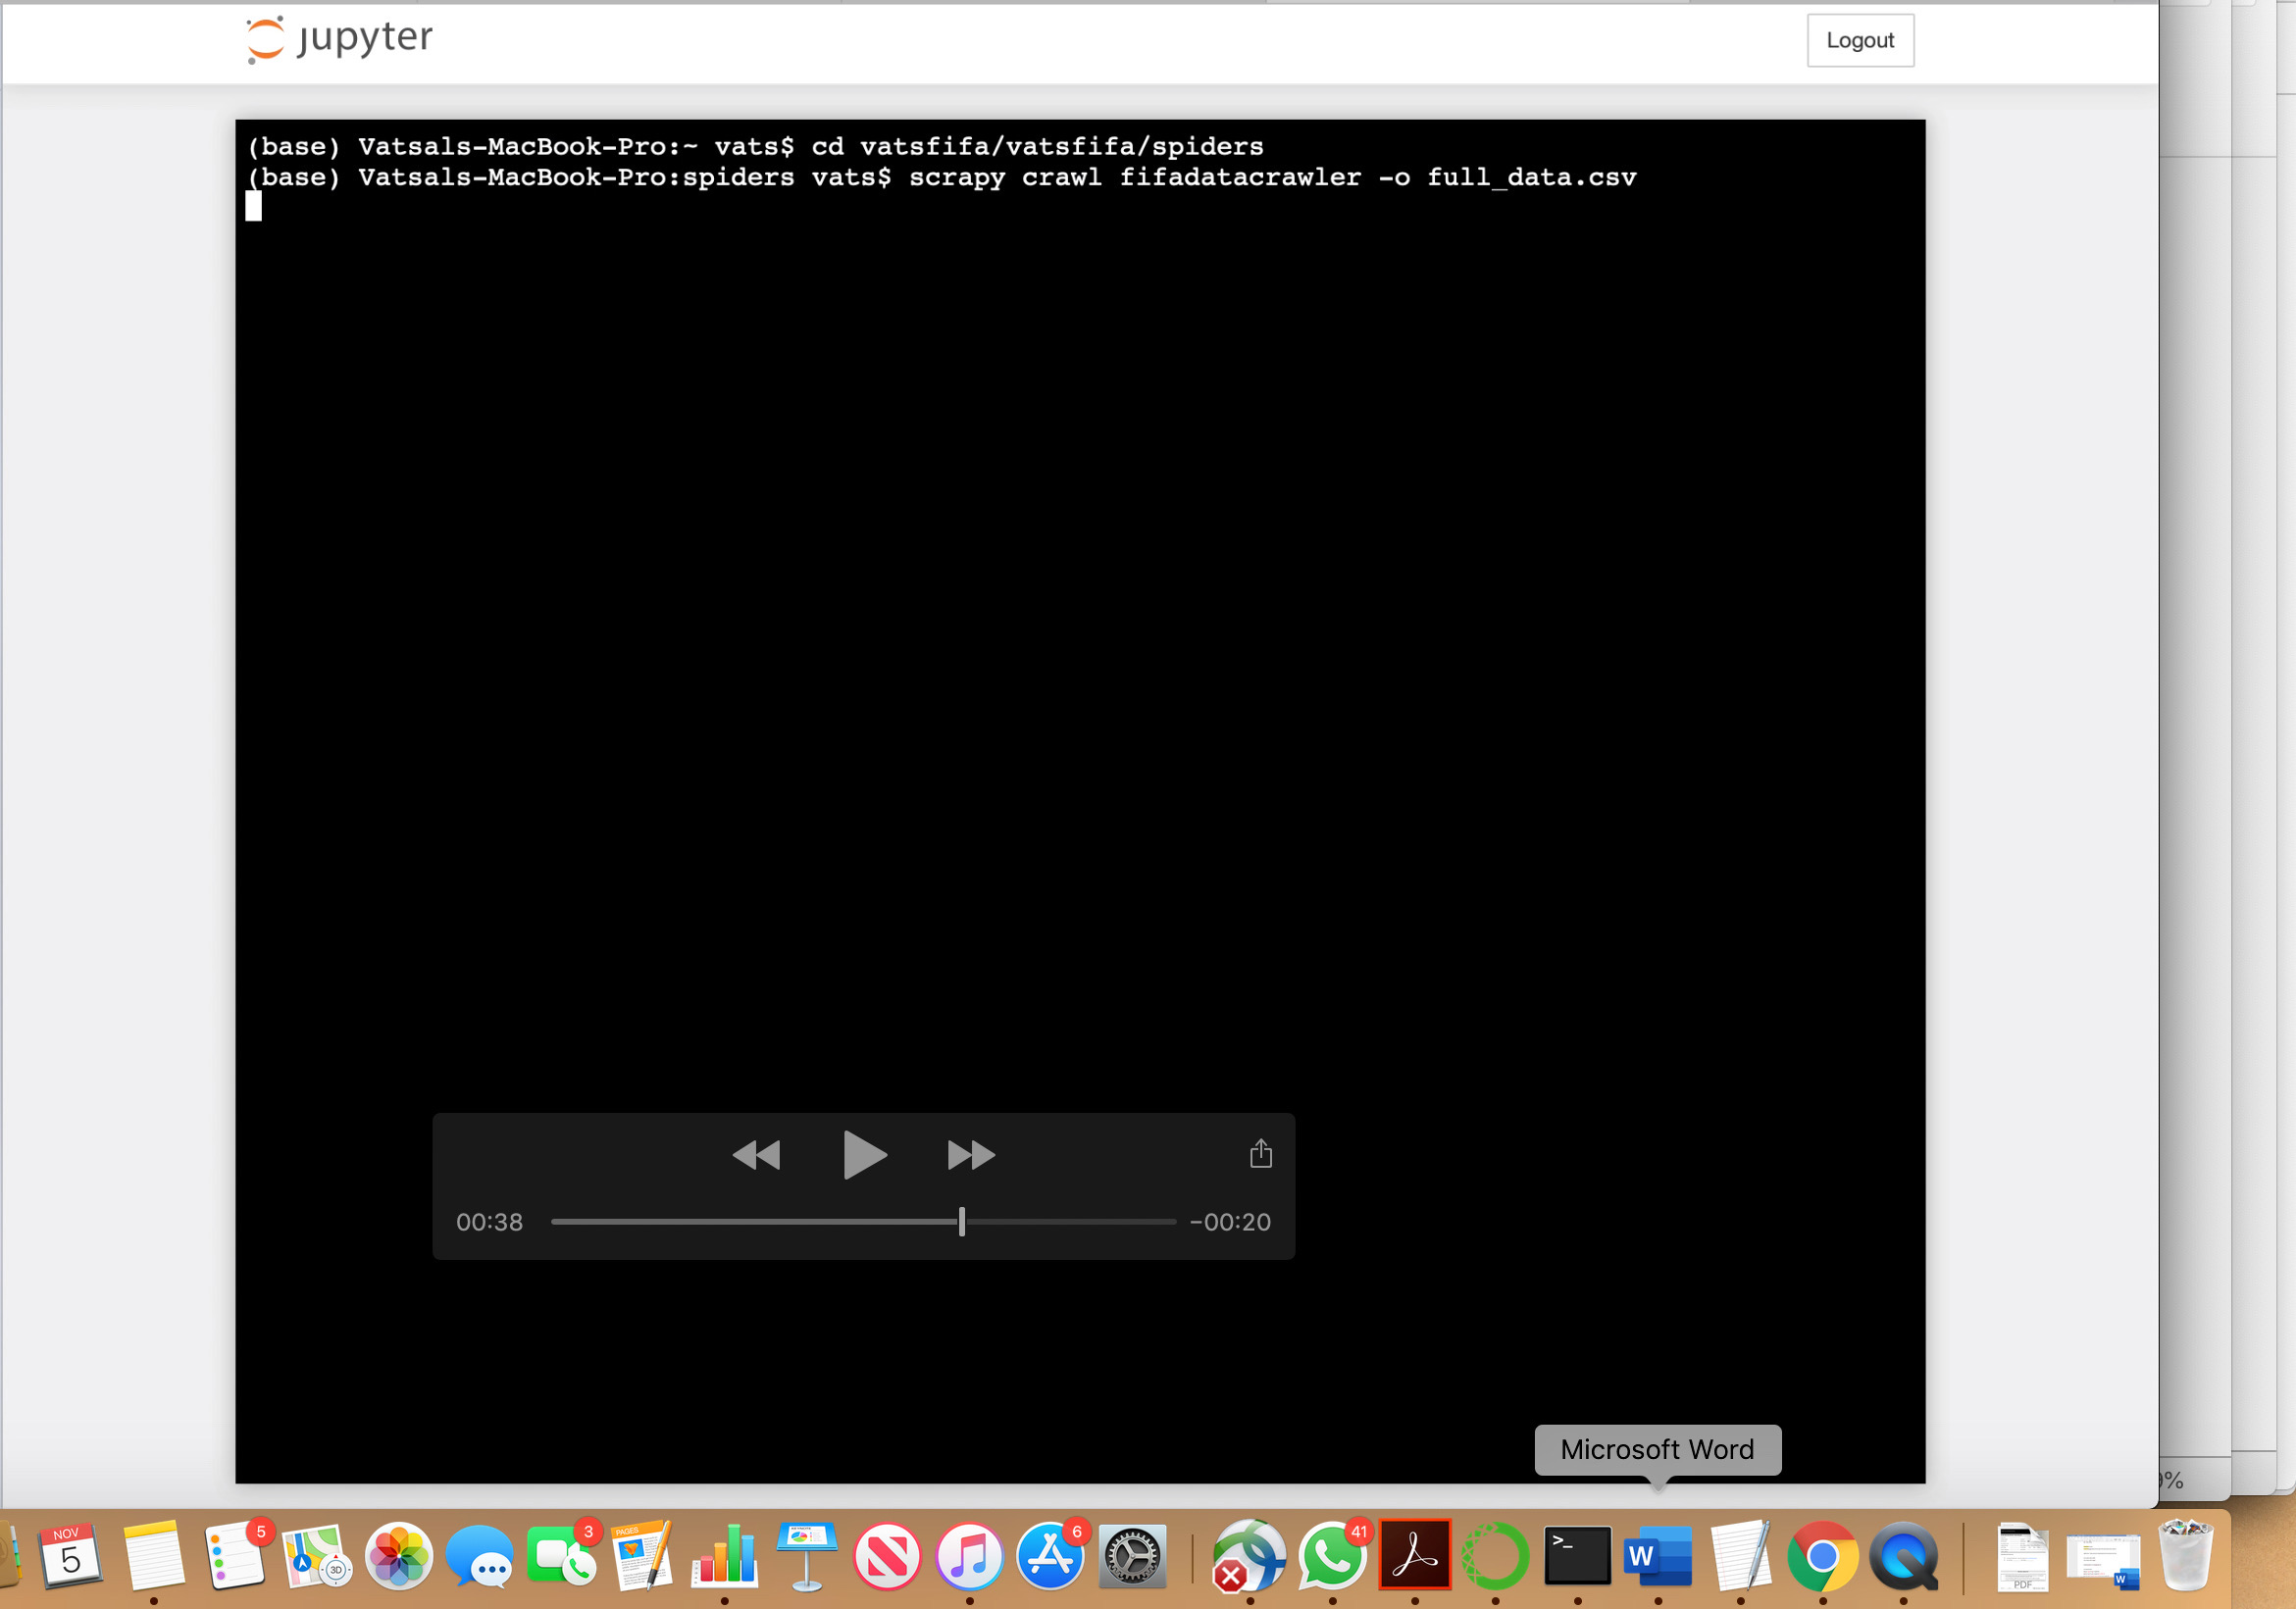

In [4]:
path="/Users/vats/Downloads/scrapyterminal1.JPG"
display(Image.open(path))

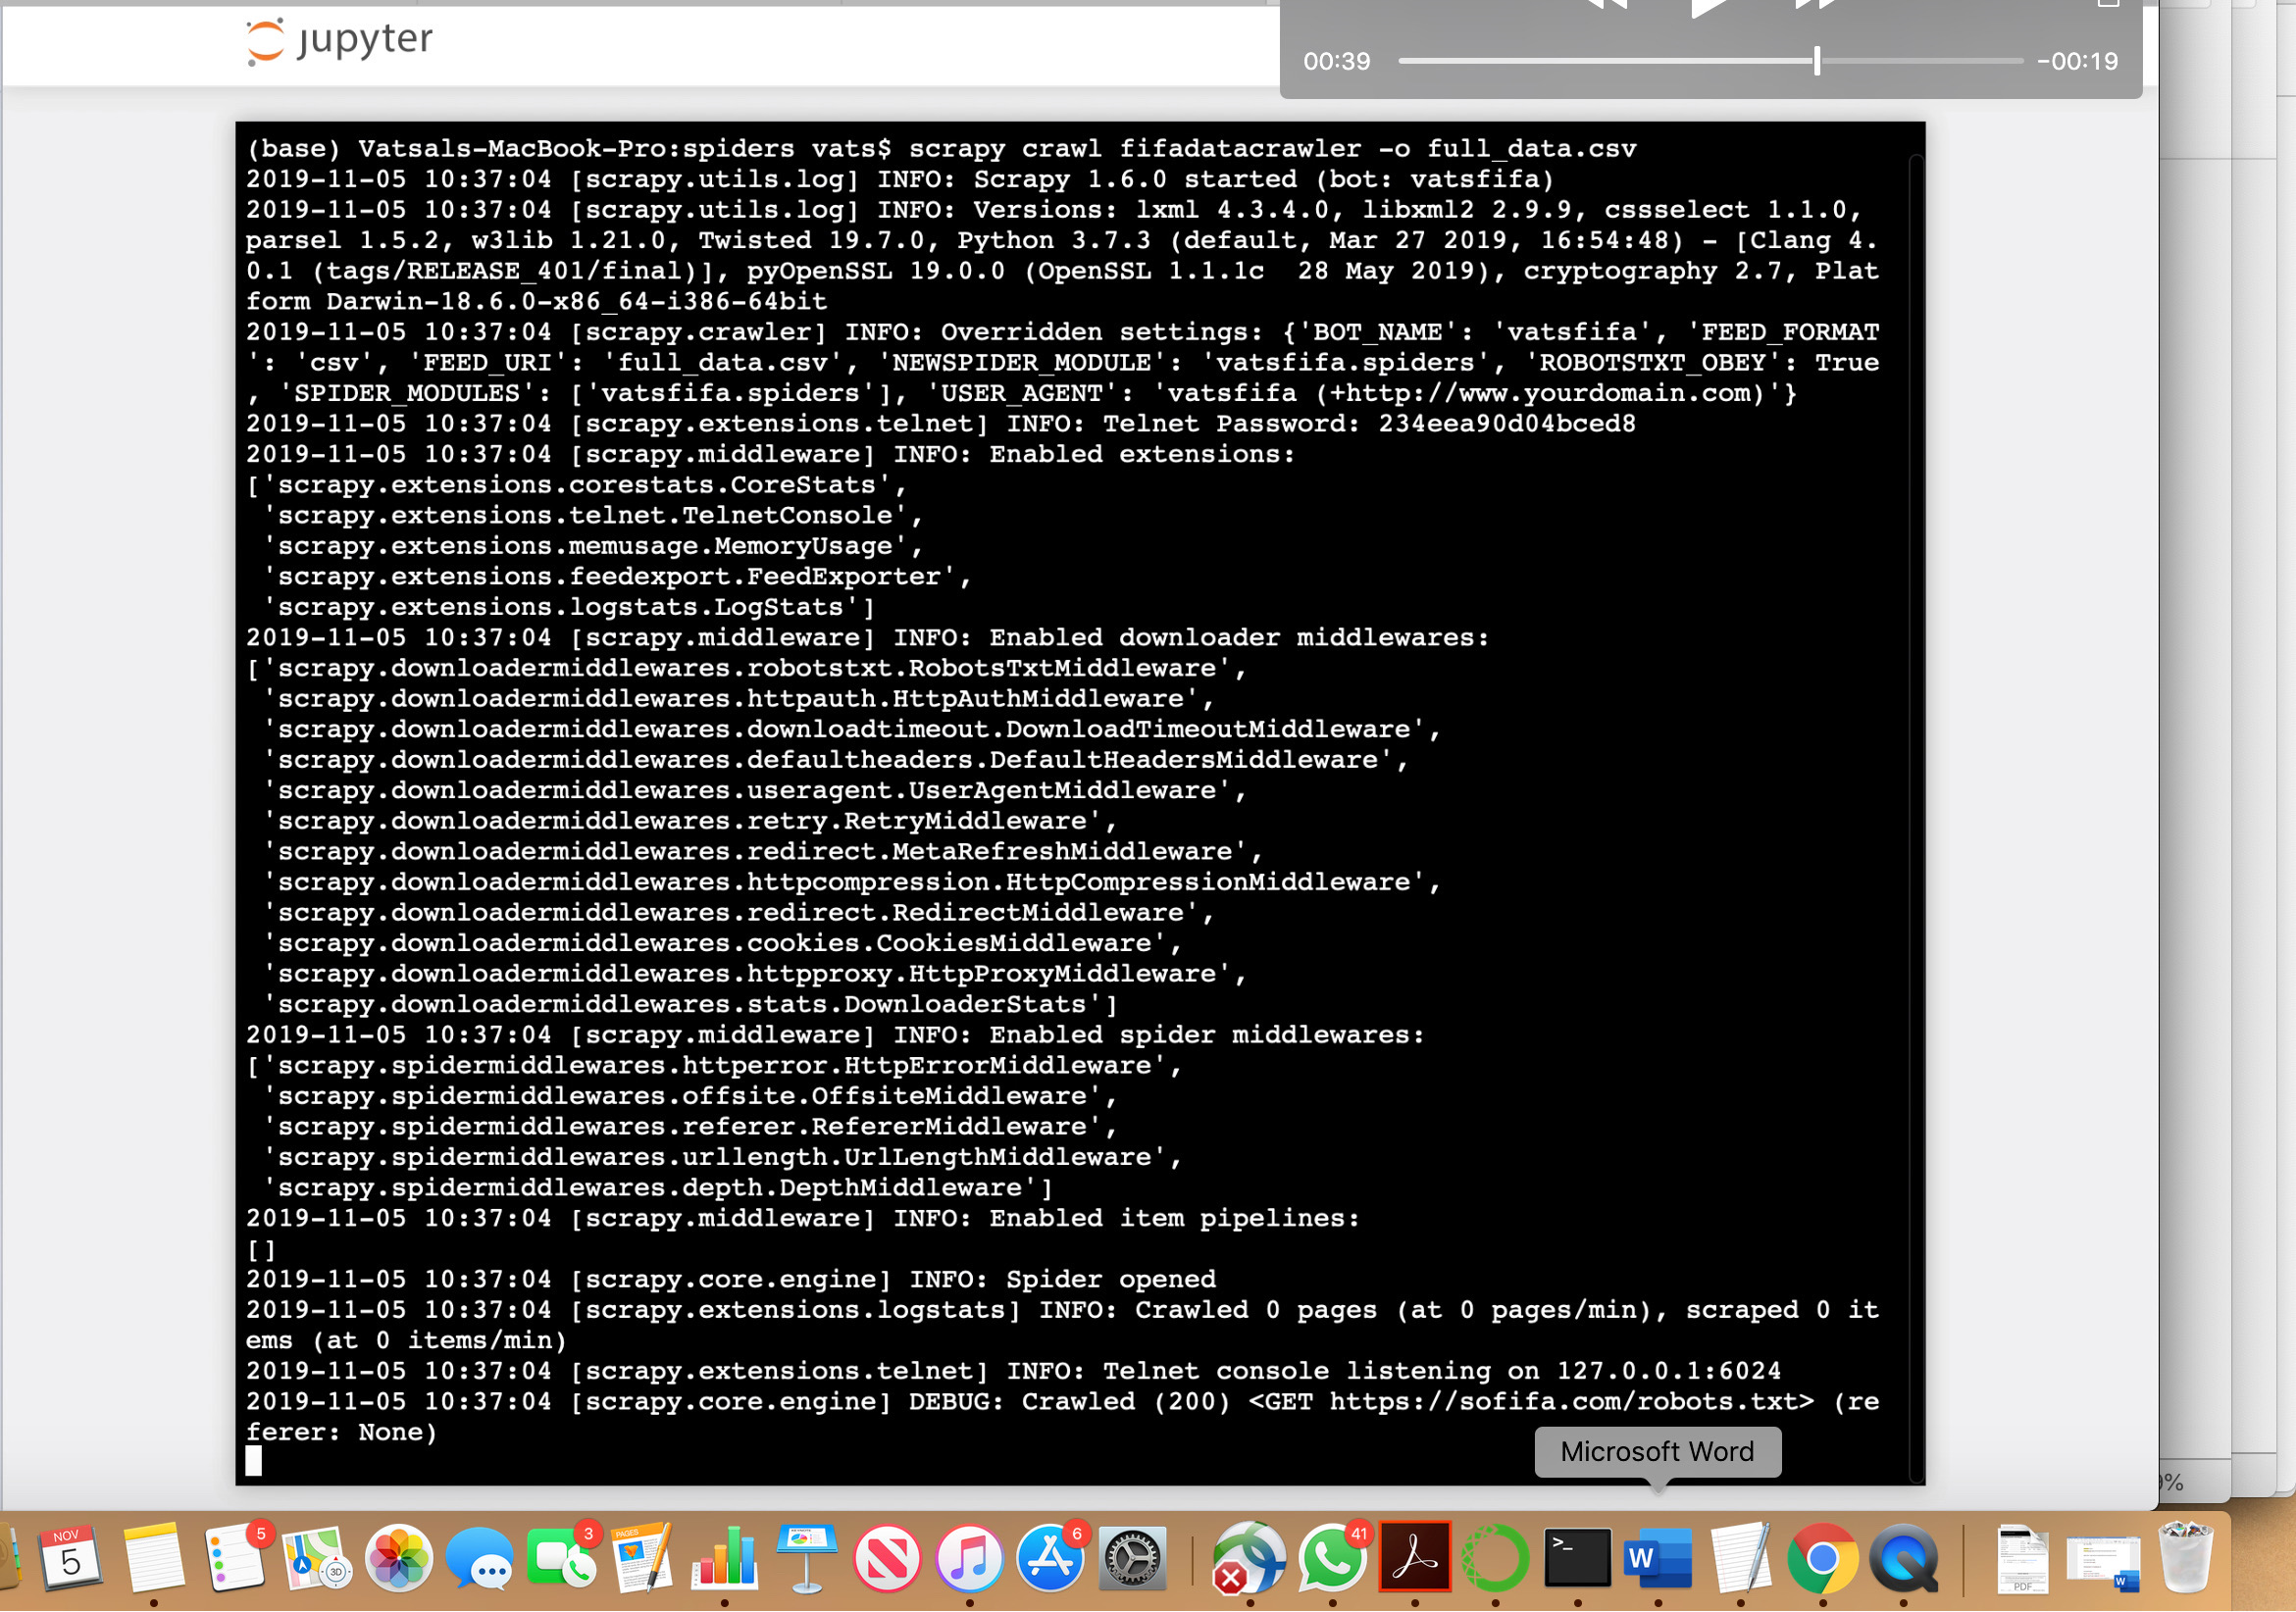

In [5]:
path="/Users/vats/Downloads/scrapyterminal2.JPG"
display(Image.open(path))

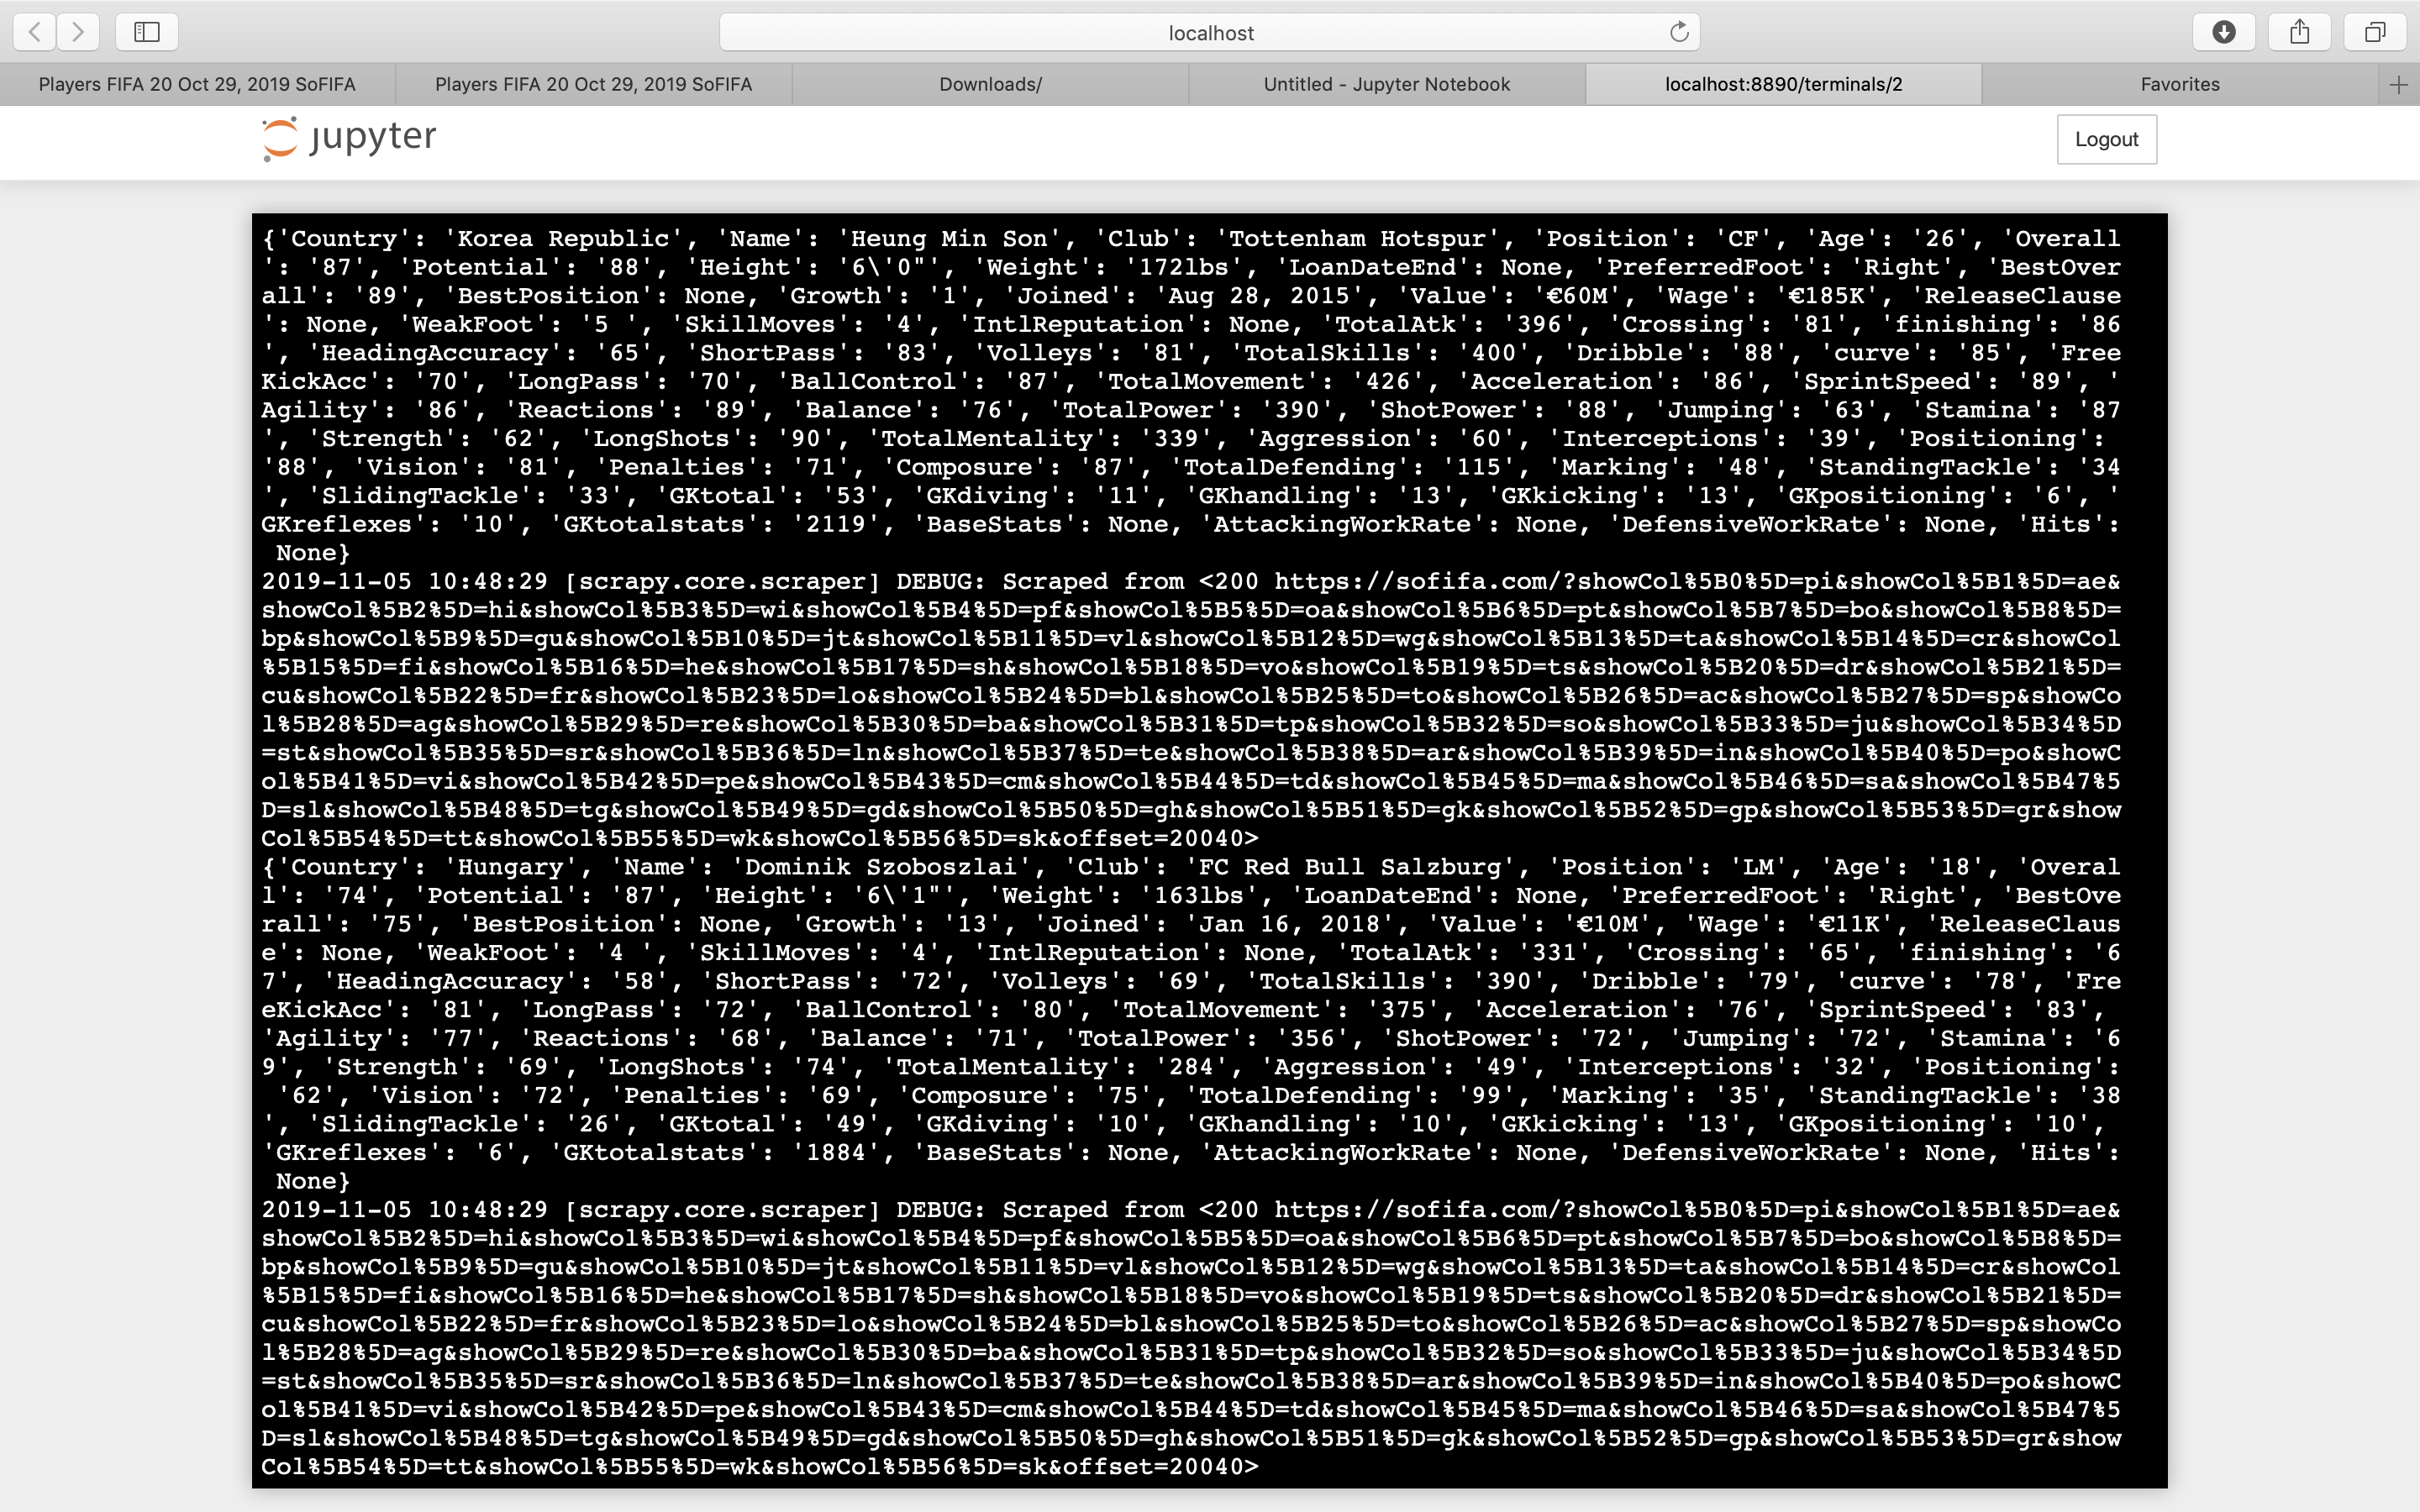

In [6]:
path="/Users/vats/Downloads/scrapyterminal4.png"
display(Image.open(path))

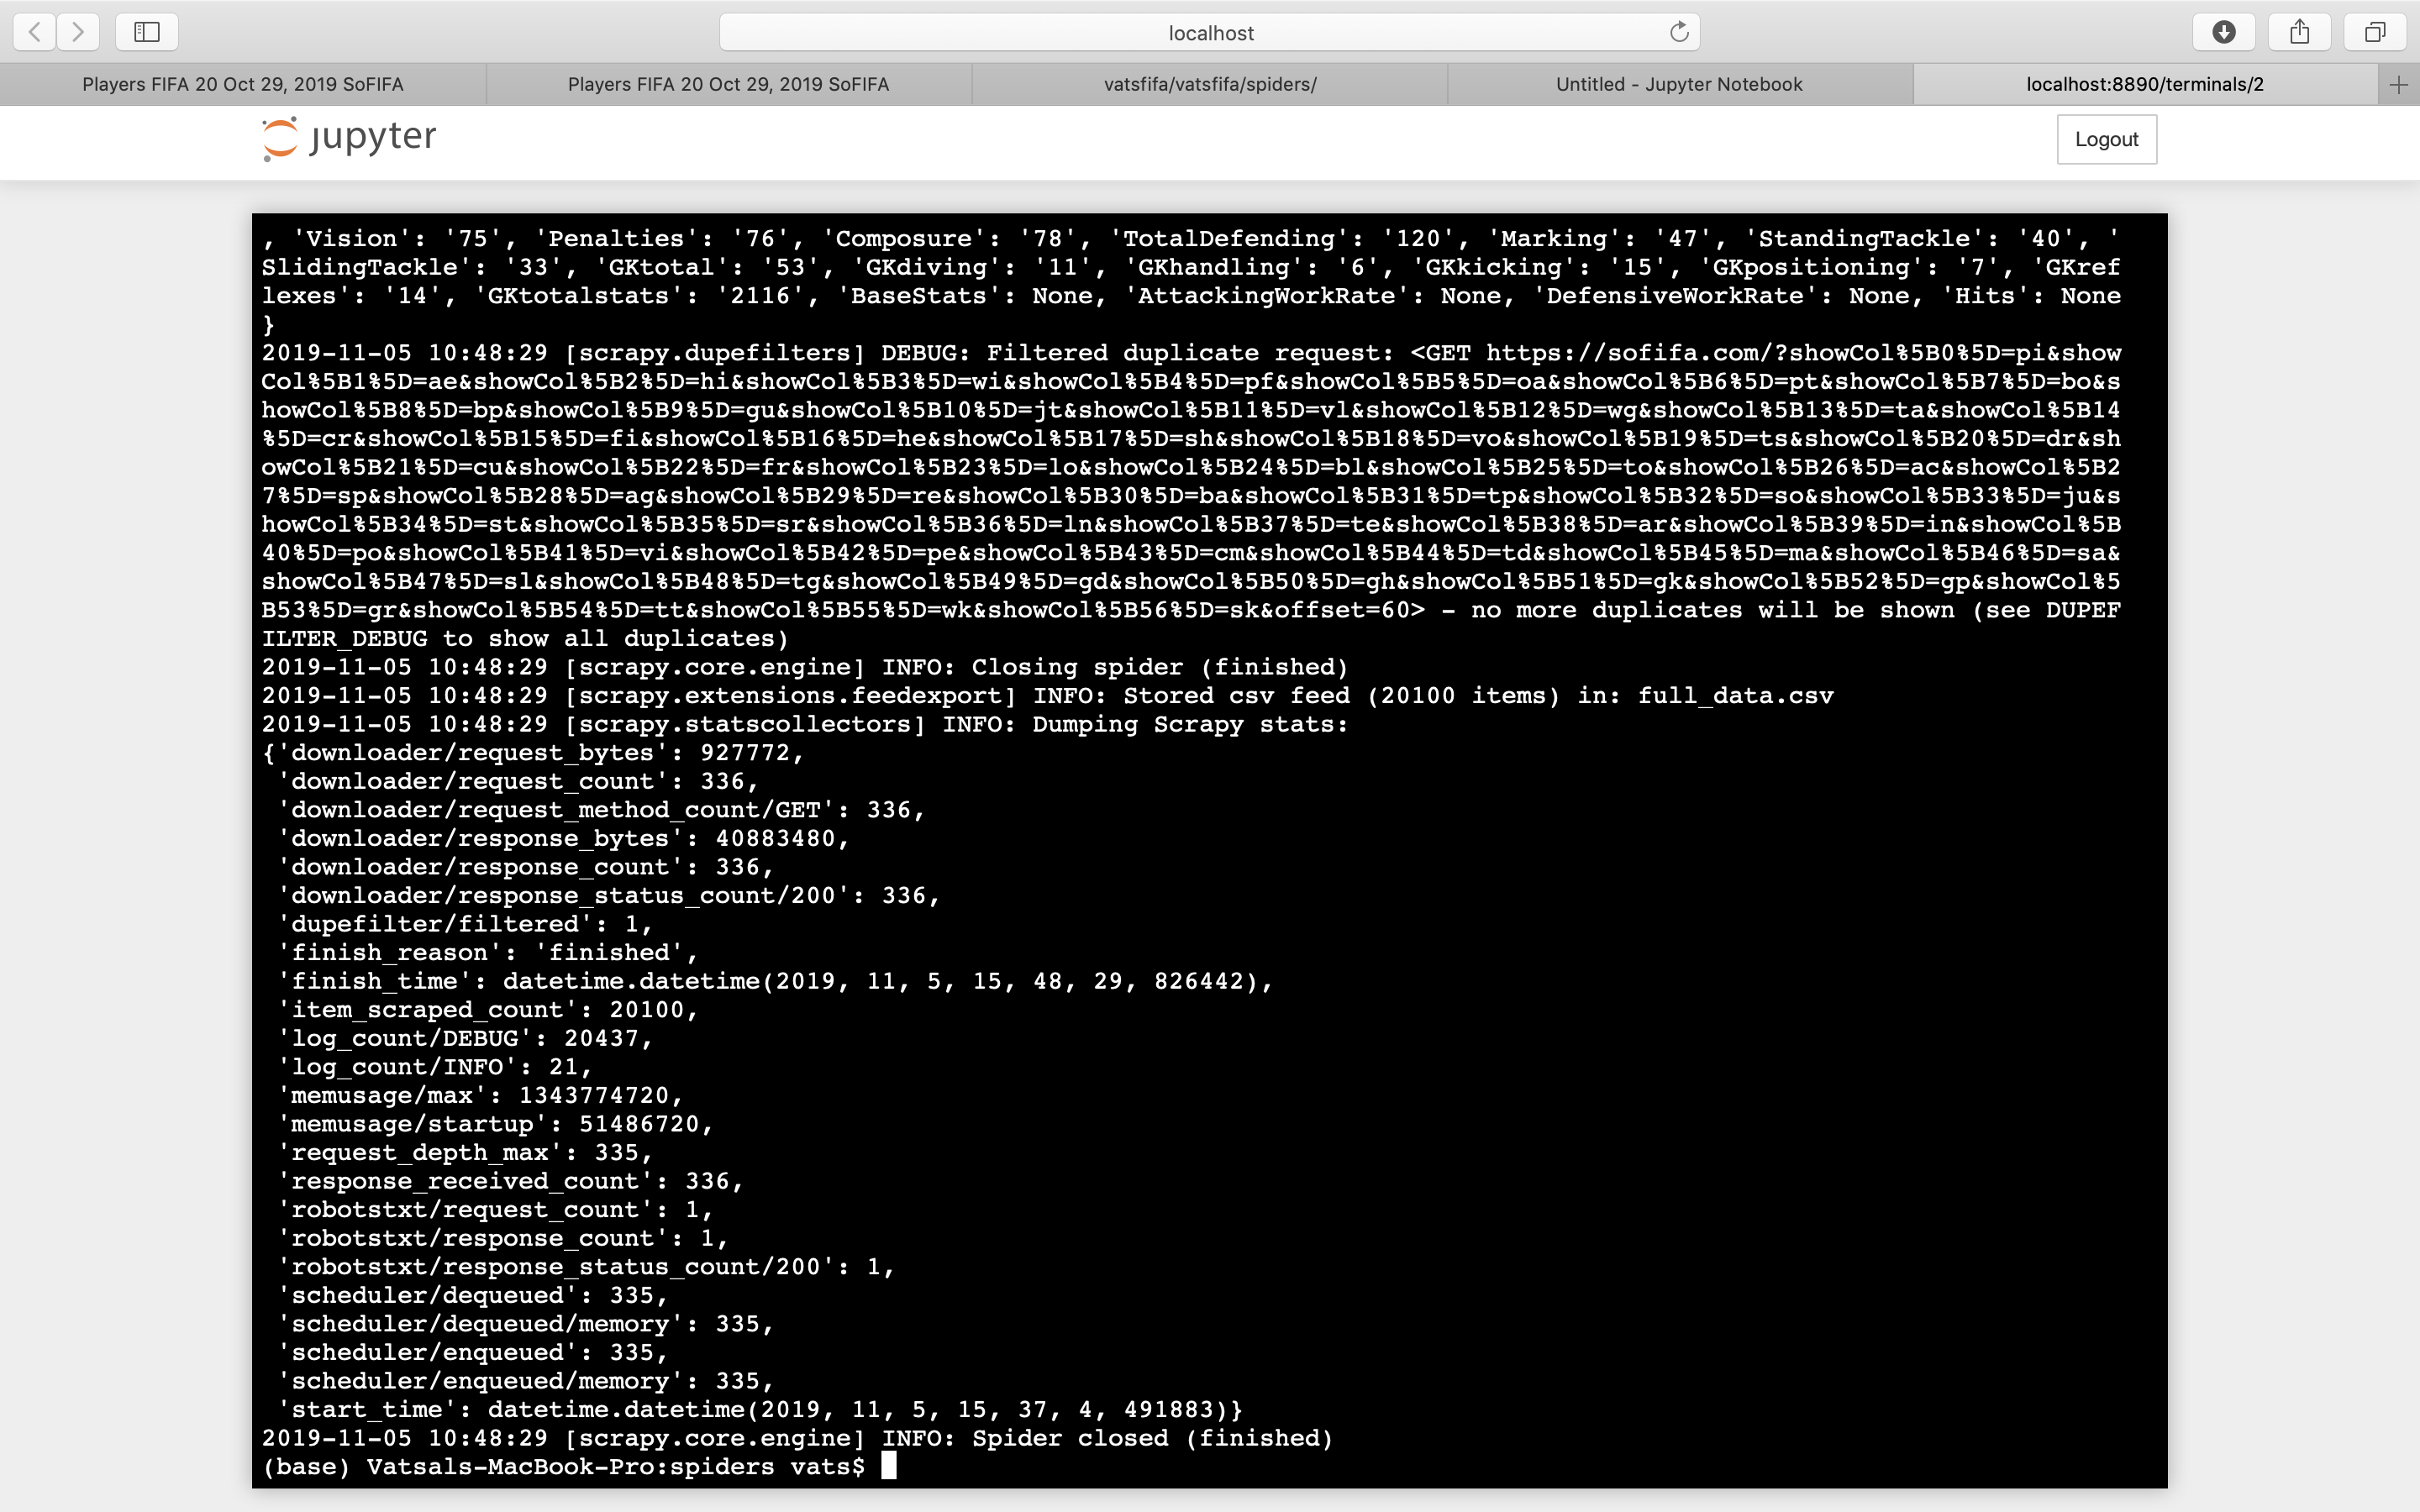

In [7]:
path="/Users/vats/Downloads/scrapyterminal3.png"
display(Image.open(path))

#### All of this scraped data is dumped by spider in .csv format (can be stored in some other format too but we were interested in .csv format)
#### At this point, .csv file has been made which can then be imported and played around with.

#### We have completed scraping of player images from the website and stored the urls in a .csv format.
#### Substantial effort went into solving changes that needed to be made in default .py files when creating a project via terminal command as mentioned before.
#### We have done that separately as we didn't want to mix it up with the .csv file on which cleansing , analysis, visualization and to some extent prediction too had to be done.
#### Below is a  screenshot showcasing extra efforts we have put in. 

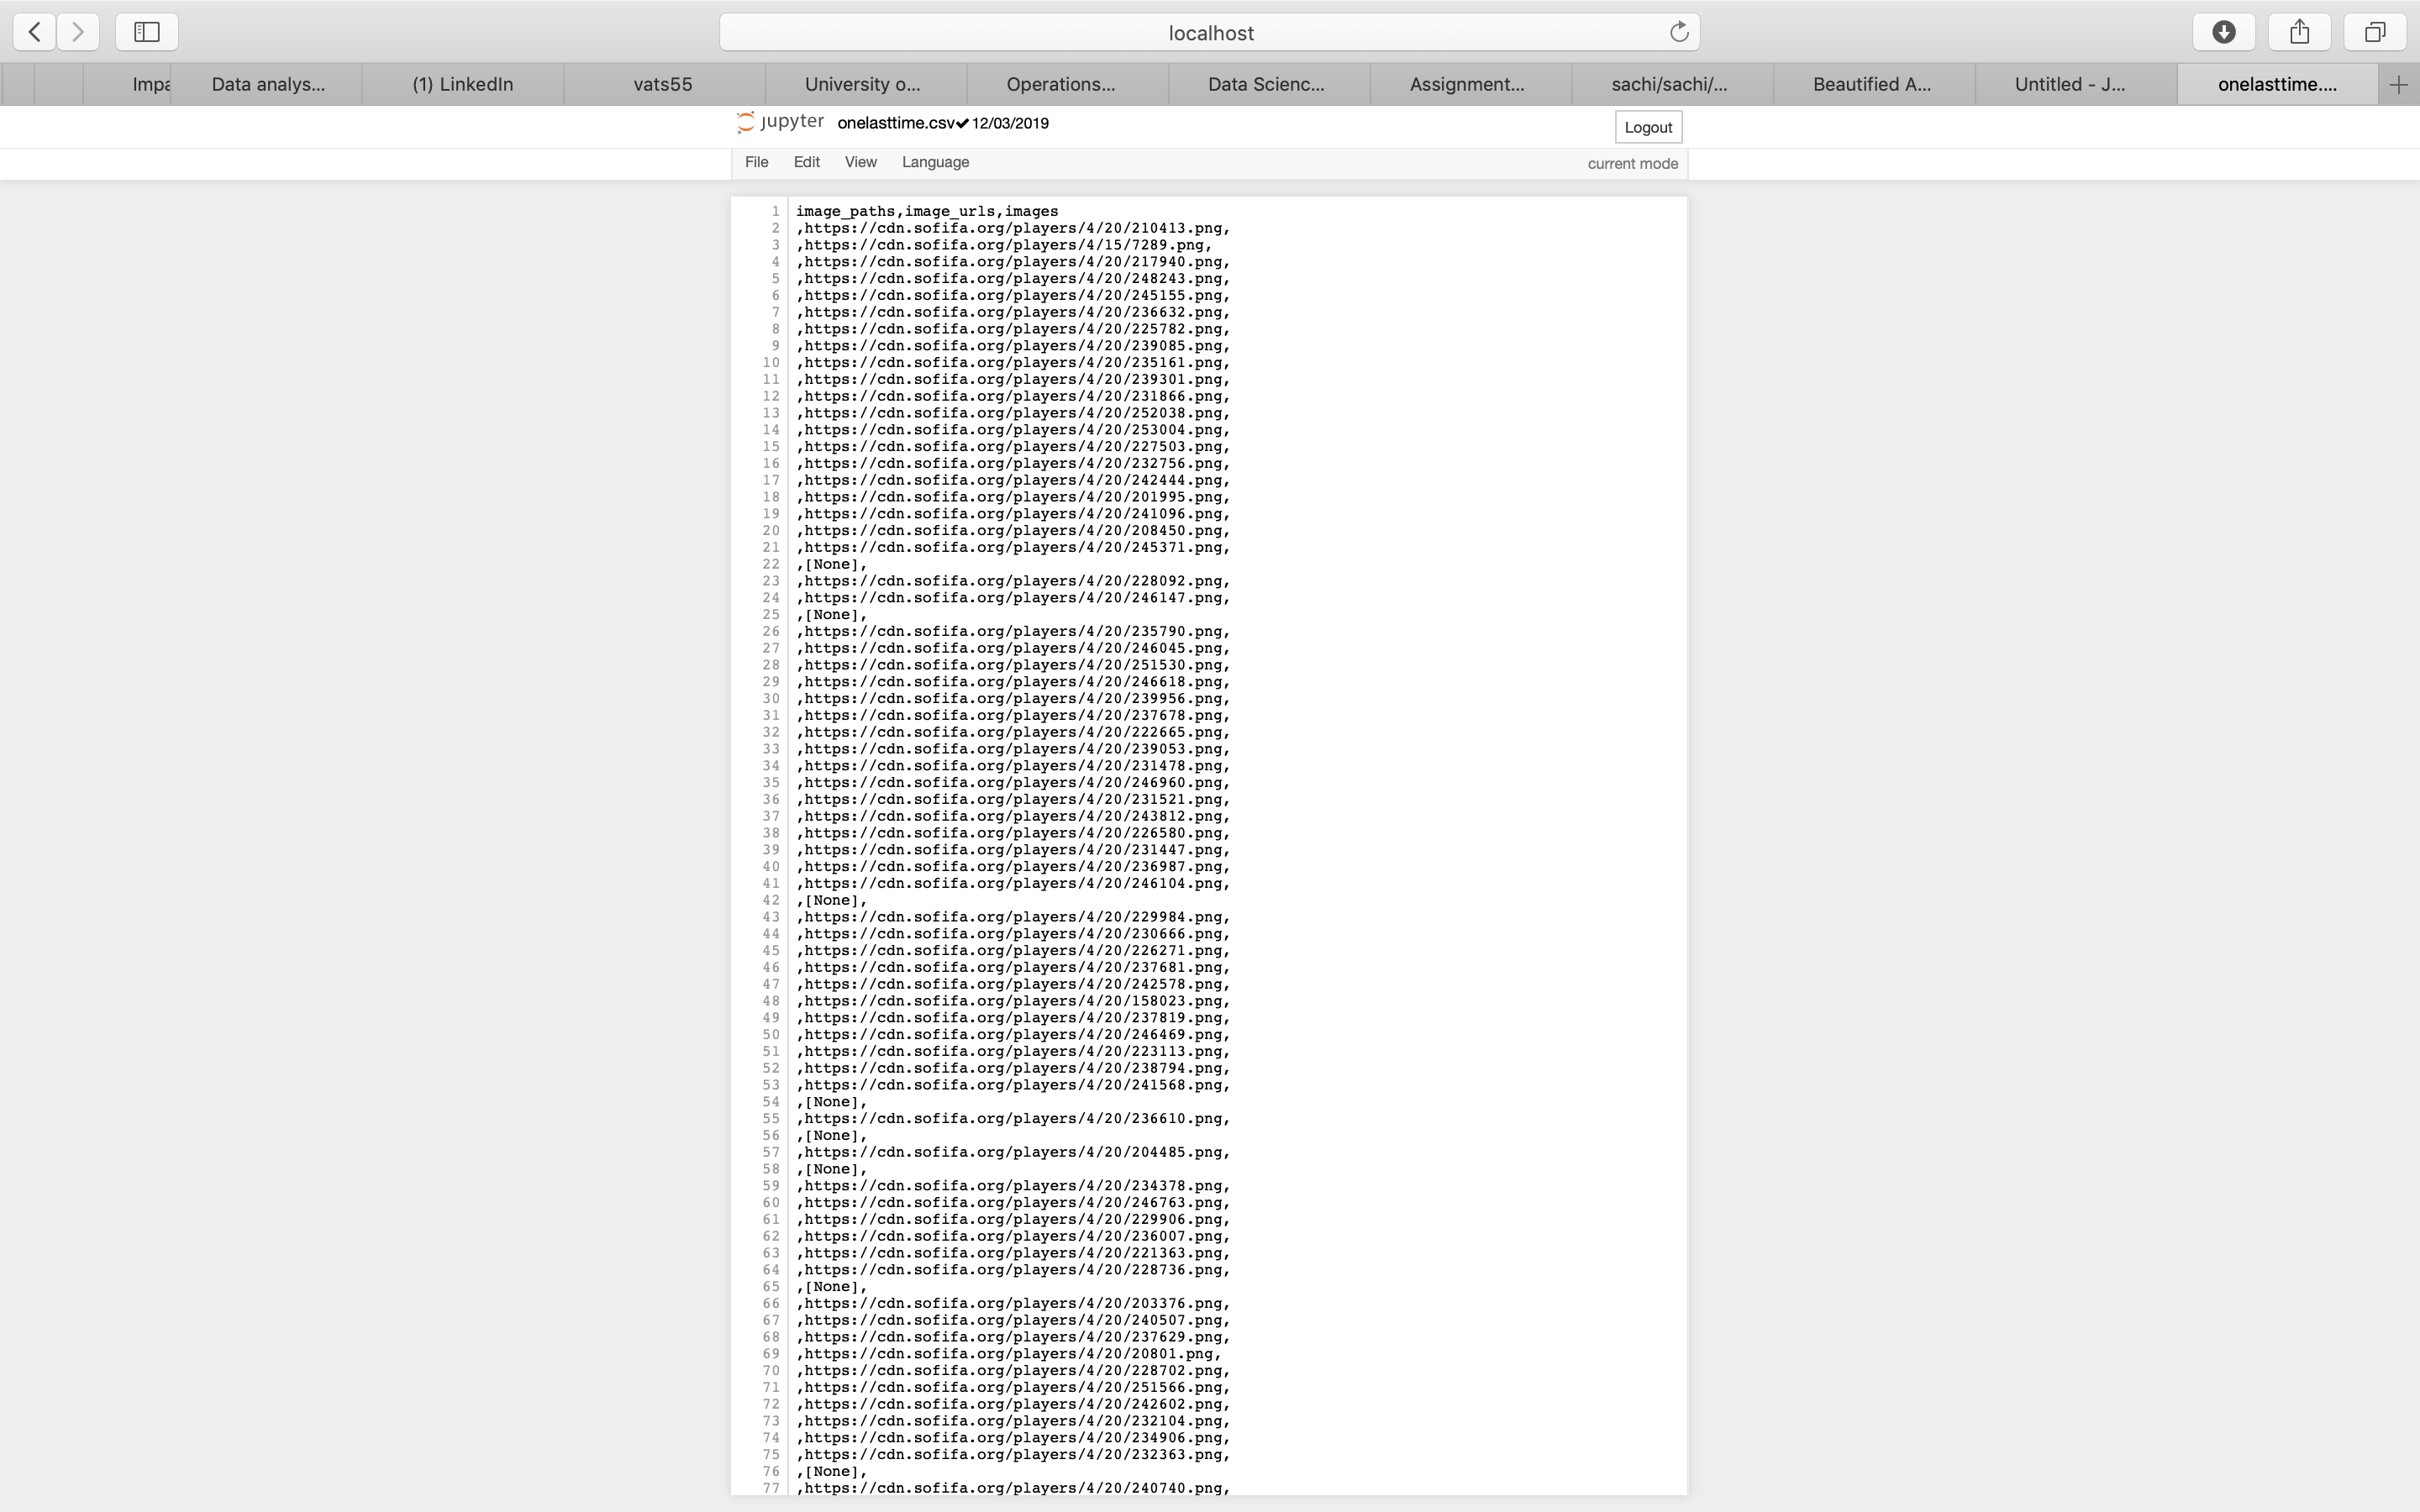

In [8]:
path="/Users/vats/Downloads/imagescrapingJSON.png"
display(Image.open(path))

In [9]:
#importing packages
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
df = pd.read_csv('fulldata.csv')
%pylab inline
import datetime as dt
import statsmodels.api as sm
pd.set_option('display.max_columns', 40)

Populating the interactive namespace from numpy and matplotlib


# Data Cleaning

#### The huge dataset with 20100 rows and 62 columns that we have extracted needs some cleaning before we go ahead with the analysis. 

#### Height and weight are important characteristics of a player. These characteristics can help us draw useful insights. More about this in the analysis part.

#### Our dataset contains the numeric values of height alongwith the feet and inches symbols (eg. 6'2"). Similarly the weight column contains the numeric value along with 'lbs' (eg. 185lbs).

#### For our analysis, we only need the numeric values of these so here we define a function to extract only the numeric values of height and weight.

In [10]:
def getNumbers(str): 
    array = re.findall(r'[0-9]+', str) 
    return array 

In [11]:
feet=[]
inches= []
for i in range(len(df)) :
    list1 = getNumbers(df['Height'][i])
    feet.append(list1[0])
    inches.append(list1[1])
    list1 = []

In [12]:
feet_df = pd.DataFrame(feet) 
inches_df = pd.DataFrame(inches) 

In [13]:
df['feet'] = feet_df.astype(float)

In [14]:
df['inches'] = inches_df.astype(float)

In [15]:
height_in_cms = []
for x in range (len(df)) :
    h = ((df['feet'][x])*30.48 + (df['inches'][x]*2.54))
    height_in_cms.append(h)

In [16]:
df['Height in cms']=height_in_cms

In [17]:
weight = []
for i in range(len(df)) :
    list2 = getNumbers(df['Weight'][i])
    weight.append(list2[0])
    list2 = []

In [18]:
df['Weight']=weight

#### Similarly, the Value and Wage columns in the dataset are as follows 
#### Eg Value (€17.5M) , Eg Wage (€76K)

#### The '€' symbol has to be removed from these columns to extract the numeric values for further analysis.  

In [19]:
df['Value']=df['Value'].apply(lambda x: x.strip('€'))
df['Wage']=df['Wage'].apply(lambda x: x.strip('€'))

#### The dataset columns of Value and Wage are not consistent. Some of the values are in Millions (M) while some are in Thousands (K). Here, we have made it consistent for accuracy in our further analysis. 

In [20]:
df.Value = (df.Value.replace(r'[KM]+$', '', regex=True).astype(float) * \
df.Value.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
df.Wage = (df.Wage.replace(r'[KM]+$', '', regex=True).astype(float) * \
df.Wage.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))

#### Our extracted dataset is huge with 20100 rows and 62 columns. All of these columns aren't relevant and are not required for the analysis. So we go ahead with deleting the extra columns that are not required for analysis. 

In [21]:
del df['LoanDateEnd']
del df['BestPosition']
del df['ReleaseClause']
del df['IntlReputation']
del df['Growth']
del df['BaseStats']
del df['AttackingWorkRate']
del df['DefensiveWorkRate']
del df['Hits']

#### Free agents are not needed for this analysis as we only want players who play for a team to be included in our analysis so we  drop values that had null for club.

In [22]:
df=df[df['Club'].notnull()]
df=df[df['Club']!='111648']

In [23]:
#To check the null values present in columns
df.isnull().sum()

Country               0
Name                  0
Club                  0
Position              0
Age                   0
Overall               0
Potential             0
Height                0
Weight                0
PreferredFoot         0
BestOverall           0
Joined               96
Value                 0
Wage                  0
WeakFoot              0
SkillMoves            0
TotalAtk              0
Crossing              0
finishing             0
HeadingAccuracy       0
ShortPass             0
Volleys              96
TotalSkills           0
Dribble               0
curve                96
FreeKickAcc           0
LongPass              0
BallControl           0
TotalMovement         0
Acceleration          0
                   ... 
Agility              96
Reactions             0
Balance              96
TotalPower            0
ShotPower             0
Jumping              96
Stamina               0
Strength              0
LongShots             0
TotalMentality        0
Aggression      

#### There are some null values in some of the columns. 

#### For these null values of each column we used the mean of the non null attributes in the corresponding columns to fill the null values.

In [24]:
#We check again for null values, Joined can be null as it is not important to be filled up for our analysis
mean=['Volleys','curve','Agility','Balance','Jumping','Interceptions','Positioning','Vision','Composure','SlidingTackle']
for i in mean:
    df[i]=df[i].fillna((df[i].mean()))
df.isnull().sum()

Country             0
Name                0
Club                0
Position            0
Age                 0
Overall             0
Potential           0
Height              0
Weight              0
PreferredFoot       0
BestOverall         0
Joined             96
Value               0
Wage                0
WeakFoot            0
SkillMoves          0
TotalAtk            0
Crossing            0
finishing           0
HeadingAccuracy     0
ShortPass           0
Volleys             0
TotalSkills         0
Dribble             0
curve               0
FreeKickAcc         0
LongPass            0
BallControl         0
TotalMovement       0
Acceleration        0
                   ..
Agility             0
Reactions           0
Balance             0
TotalPower          0
ShotPower           0
Jumping             0
Stamina             0
Strength            0
LongShots           0
TotalMentality      0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties 

## Data Analysis
#### Our goal in this step is of discovering useful information, informing conclusion and supporting decision-making related to our data set. Data analysis has multiple facets and approaches, encompassing diverse techniques under a variety of names, and is used in different business, science, and social science domains. In today's business world, data analysis plays a role in making decisions more scientific and helping businesses operate more effectively

### The analysis is divided into 7 important questions that we wanted to get out of the data set

#### 1) Do physical attributes affect the overall of the player?

#### 2) Who are the most loyal players in the game and what is the biggest age gap?

#### 3) Which is the least popular position and why?

#### 4) Is there a relation between the wage and value of players?

#### 5) Is there a difference between the highest rated players and the dream team?

#### 6) How is the value of the player affected by his potential?

#### 7) Which are the most lethal countries in the game?


## Analysis 1 - Physical Attributes 

### Do physical attributes affect the overall of the player and is there any kind of physical feature that affects the overall of a player?

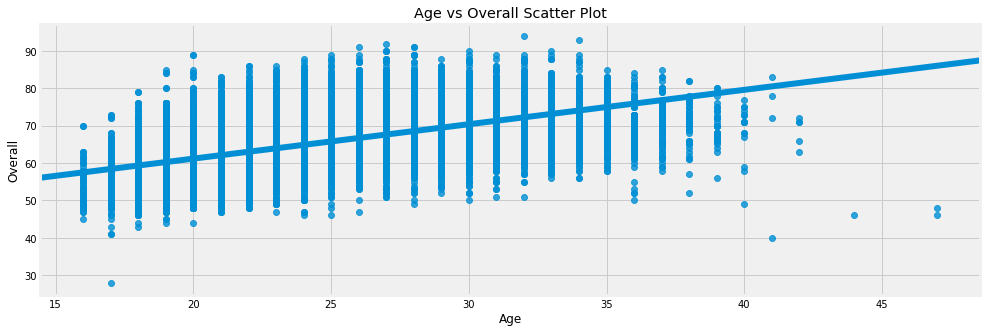

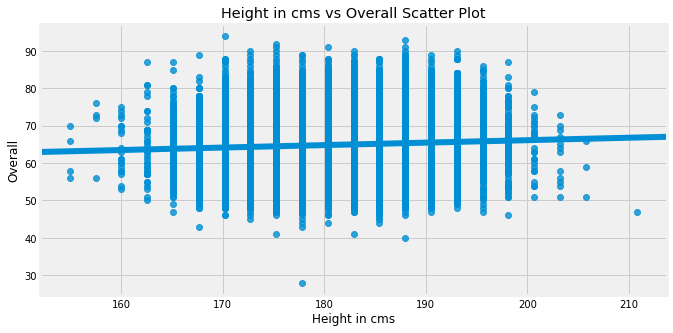

In [25]:
#Is there a relation between age and overall rating?
plt.figure(1,figsize=(15,5))
sns.regplot(df['Age'],df['Overall'])
plt.title('Age vs Overall Scatter Plot')
plt.show()

#Is there a relation between height and overall rating?
plt.figure(1,figsize=(10,5))
sns.regplot(df['Height in cms'],df['Overall'])
plt.title('Height in cms vs Overall Scatter Plot')
plt.show()

### Inference
#### From the trend line in the scatterplots displayed above, it is observed that, age significantly affects the overall rating of the player positively as there is a clear upward trend. This validates the fact that experience increases with age since players acquire more skills through training and playing for more number of years. On the other hand, height does not really seem to affect the overall rating of the player as this trend line seems to be flat. Thus height is not an important attribute to consider while valuing a player. 

## Analysis 2 - Age and Loyalty

### Who are the most loyal players in the games and what is the biggest age gap in the game?

In [26]:
#The most loyal players
#Finding the number of years the players have played for the same team and then ordering them by the highest value
now = datetime.datetime.now()
df['Year of Joining'] = df.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
df['Loyalty'] = (df['Year of Joining'].dropna().map(lambda x: now.year - int(x))).astype('int')
Loyalty = df[['Name', 'Club', 'Age','Joined','Loyalty']].sort_values(by = 'Loyalty', ascending = False).head(10)
Loyalty.set_index('Name', inplace=True)
Loyalty


Club  Age       Joined  \
Name                                                                     
Ryan Giggs                         Manchester United   39  Dec 1, 1990   
Rogério Mücke Ceni                         São Paulo   40  Jan 1, 1992   
Paul Scholes                       Manchester United   37  Jul 8, 1993   
Francesco Totti                                 Roma   39  Jan 1, 1993   
Javier Zanetti                                 Inter   39  Jul 1, 1995   
Tiago Alexandre Baptista Ferreira        Sporting CP   36  Jan 1, 1995   
Jamie Carragher                            Liverpool   34  Oct 1, 1996   
Xavier Hernández Creus                  FC Barcelona   34  Jul 1, 1998   
Aaron Webster                          Burton Albion   31  Jan 1, 1998   
Altin Lala                               Hannover 96   35  Jan 1, 1998   

                                   Loyalty  
Name                                        
Ryan Giggs                            29.0  
Rogério Mücke Ceni                    27.0  
Paul Scholes                          26.0  
Francesco Totti                       26.0  
Javier Zanetti                        24.0  
Tiago Alexandre Baptista Ferreira     24.0  
Jamie Carragher                       23.0  
Xavier Hernández Creus                21.0  
Aaron Webster                         21.0  
Altin Lala                            21.0

#### The most loyal players

#### Clubs with the highest age gap between players 

In [27]:
#Clubs with the highest age gap between players
def agegap(group):
    return group.max() - group.min()
df.groupby(by=df['Club'])['Age'].agg(agegap).sort_values(ascending=False).head()

Club
Gillingham           30
Wycombe Wanderers    28
Cambridge United     27
Deportivo Cali       25
Colorado Rapids      24
Name: Age, dtype: int64

### Inference 
#### The analysis shows us retention on how passionate a player can be about their club and football by remaining with the same football club for their career. In addition, from the visualization one can see that a player can be younger but have more loyalty points than someone who is older than than them. It also tells us that it's never too early to start playing football and never too early to stop either. 
#### All it takes is passion, will and determination from the player themselves :)

## Analysis 3 - Positions 

### Which is the least popular position and why?

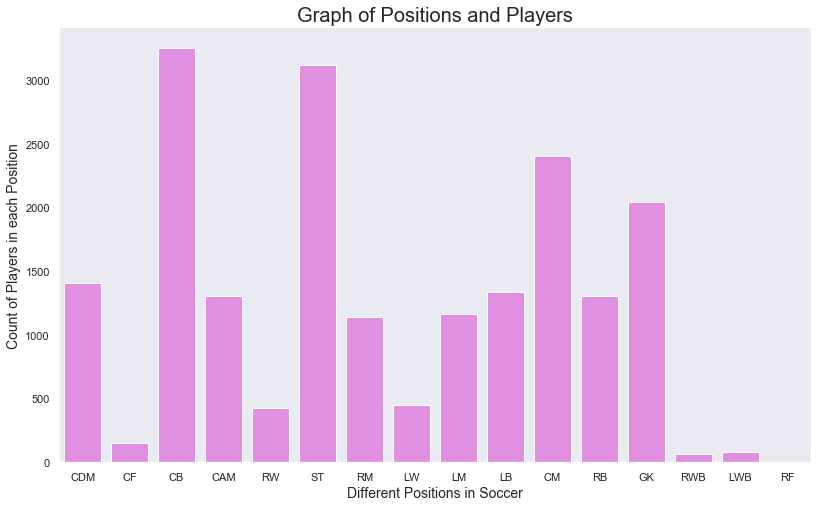

In [28]:
#Finding the distribution of players in each position
plt.figure(figsize = (12, 8))
sns.set(style = 'dark', palette = 'deep', color_codes = True)
ax = sns.countplot('Position', data = df, color = 'violet')
ax.set_xlabel(xlabel = 'Different Positions in Soccer', fontsize = 14)
ax.set_ylabel(ylabel = 'Count of Players in each Position', fontsize = 14)
ax.set_title(label = 'Graph of Positions and Players', fontsize = 20)
plt.show()

### Conclusion/Inference
#### This analysis shows us that the centerback position is the most popular position to play in football, whereas it is very rare to find a player playing Right Forward 'RF', this might be due to the fact that it may be difficult to adapt to the skills that the position requires or that there are not enough teams playing with a formation that uses right forward in competition.

## Analysis 4 - Wage vs Value of a player 

#### Is there a relation between the wage and value of players?

#### First, lets look at some statistics of the wages of players in the game

#### Teams paying the most in wages

In [29]:
#Teams paying the most wages
df.groupby(by=df['Club'])['Wage'].agg(sum).sort_values(ascending=False).head()

Club
Real Madrid            5545000.0
FC Barcelona           5303000.0
Juventus               4134000.0
Manchester City        4012000.0
Paris Saint-Germain    2902000.0
Name: Wage, dtype: float64

#### Players who earn the most wages and the least wages in football

In [30]:
#Players who earn the most
df.sort_values(by = 'Wage' , ascending = False)[['Name','Club','Country','Overall','Age','Position','Value','Wage']].head()

Name             Club    Country  Overall  Age  \
82                   Lionel Messi     FC Barcelona  Argentina       94   32   
166                   Eden Hazard      Real Madrid    Belgium       91   28   
95   C. Ronaldo dos Santos Aveiro         Juventus   Portugal       93   34   
249               Kevin De Bruyne  Manchester City    Belgium       91   28   
275             Antoine Griezmann     FC Barcelona     France       89   28   

    Position       Value      Wage  
82        RW  95500000.0  565000.0  
166       LW  90000000.0  470000.0  
95        ST  58500000.0  405000.0  
249      CAM  90000000.0  370000.0  
275       CF  69000000.0  370000.0

### Lets also look at some statistics of the value of players in the game

#### The most expensive players

In [31]:
#The most expensive players
df.sort_values(by = 'Value' , ascending = False)[['Name','Club','Country','Overall','Age','Position','Value','Wage']].head()

Name                 Club    Country  Overall  \
126    Neymar da Silva Santos Jr.  Paris Saint-Germain     Brazil       92   
82                   Lionel Messi         FC Barcelona  Argentina       94   
20071               Kylian Mbappé  Paris Saint-Germain     France       89   
30                  Kylian Mbappé  Paris Saint-Germain     France       89   
249               Kevin De Bruyne      Manchester City    Belgium       91   

       Age Position        Value      Wage  
126     27       LW  105500000.0  290000.0  
82      32       RW   95500000.0  565000.0  
20071   20       ST   93500000.0  155000.0  
30      20       ST   93500000.0  155000.0  
249     28      CAM   90000000.0  370000.0

#### Is there any relation between the Wage and Value?
### If there is, what is it?

In [32]:
np.corrcoef(df['Value'],df['Wage'])

array([[1.        , 0.85233913],
       [0.85233913, 1.        ]])

#### There is a high correlation between the two which can be show in the above code
### Let's create a scatterplot to show this

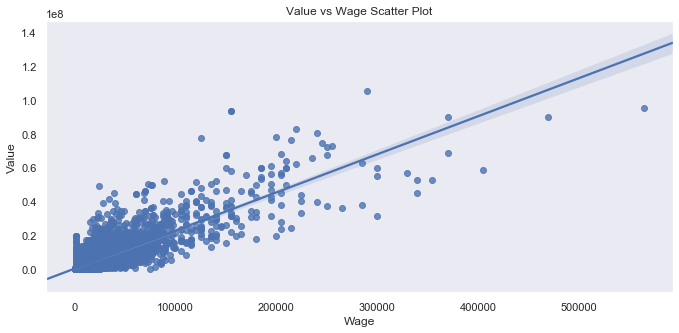

In [33]:
plt.figure(1,figsize=(10,5))
sns.regplot(df['Wage'],df['Value'])
plt.title('Value vs Wage Scatter Plot')
plt.show()

### Inference
#### The scatterplot shows us that as the value increases the wage increases, this is because the more valuable the player is to a team, the more the team has to pay in order for him to stay at the club and not be recruited by another team.

## Analysis 5 - Ratings, Highest rated Team vs Dream Team 

### Is there a difference between the highest rated players and the dream team?

#### Let's look at the highest rated players and team and whether they correspond to the dream team

In [34]:
#Highest rated player in each position
df.groupby(by=df['Position'])['Overall'].agg('max')
x=pd.DataFrame()
grouped = df.groupby(by=df['Position'])
position=df['Position'].unique()
for i in position:
    x=x.append(grouped.get_group(i).sort_values(by='Overall',ascending=False).head(1),ignore_index=True)
    

x

Country                          Name                     Club  \
0         Spain        Sergio Busquets Burgos             FC Barcelona   
1        France             Antoine Griezmann             FC Barcelona   
2   Netherlands               Virgil van Dijk                Liverpool   
3       Belgium               Kevin De Bruyne          Manchester City   
4     Argentina                  Lionel Messi             FC Barcelona   
5      Portugal  C. Ronaldo dos Santos Aveiro                 Juventus   
6         Spain            Jorge Resurrección          Atlético Madrid   
7        Brazil    Neymar da Silva Santos Jr.      Paris Saint-Germain   
8       Algeria                Yacine Brahimi                 FC Porto   
9         Spain              Jordi Alba Ramos             FC Barcelona   
10      Croatia                   Luka Modrić              Real Madrid   
11      Germany                  Philipp Lahm        FC Bayern München   
12     Slovenia                     Jan Oblak          Atlético Madrid   
13       Russia      Mário Figueira Fernandes          PFC CSKA Moscow   
14        Spain          Jonathan Castro Otto  Wolverhampton Wanderers   
15        Italy                Mauro Esposito                 Grosseto   

   Position  Age  Overall  Potential Height Weight PreferredFoot  BestOverall  \
0       CDM   30       89         89   6'2"    168         Right           89   
1        CF   28       89         89   5'9"    161          Left           90   
2        CB   27       90         91   6'4"    203         Right           90   
3       CAM   28       91         91  5'11"    154         Right           91   
4        RW   32       94         94   5'7"    159          Left           95   
5        ST   34       93         93   6'2"    183         Right           94   
6        RM   27       85         85   5'9"    163         Right           88   
7        LW   27       92         92   5'9"    150         Right           93   
8        LM   28       85         85   5'9"    146         Right           86   
9        LB   30       87         87   5'7"    150          Left           87   
10       CM   33       90         90   5'8"    146         Right           90   
11       RB   32       88         88   5'7"    146         Right           89   
12       GK   26       91         93   6'2"    192         Right           91   
13      RWB   28       82         82   6'2"    176         Right           82   
14      LWB   25       79         83   5'7"    154         Right           79   
15       RF   30       73         78   5'8"    157         Right           76   

          Joined        Value      Wage  WeakFoot  SkillMoves  TotalAtk  \
0    Sep 1, 2008   55000000.0  300000.0         3           3       330   
1   Jul 12, 2019   69000000.0  370000.0         3           4       428   
2    Jan 1, 2018   78000000.0  200000.0         3           2       314   
3   Aug 30, 2015   90000000.0  370000.0         5           4       404   
4    Jul 1, 2004   95500000.0  565000.0         4           4       433   
5   Jul 10, 2018   58500000.0  405000.0         4           5       437   
6    Jan 1, 2011   40500000.0   88000.0         4           3       364   
7    Aug 3, 2017  105500000.0  290000.0         5           5       410   
8   Jul 22, 2014   39000000.0   28000.0         3           4       353   
9    Jul 1, 2012   40000000.0  240000.0         3           3       374   
10   Aug 1, 2012   45000000.0  340000.0         4           4       381   
11   Nov 1, 2002   29500000.0  140000.0         3           3       346   
12  Jul 16, 2014   77500000.0  125000.0         3           1        95   
13   Jul 1, 2012   19000000.0   60000.0         3           3       336   
14  Jan 31, 2019   14500000.0   72000.0         3           4       314   
15           NaN          0.0       0.0         3           1       279   

    Crossing  finishing  HeadingAccuracy  ...  Positioning     Vision  \
0         62         6

#### These are the players who are the highest rated in each position. 

### Let's now create the Dream Team by finding 10 attributes or features which are most important for each position and see if there is a difference

In [35]:
# What are the best 10 features for each position and according to that we make our dream team
dream_team={}
features = ('Crossing', 'finishing',
       'HeadingAccuracy', 'ShortPass', 'Volleys', 'Dribble',
       'curve', 'FreeKickAcc', 'LongPass', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
        'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKdiving',
       'GKhandling', 'GKkicking', 'GKpositioning', 'GKreflexes')
for i, val in df.groupby(df['Position'])[features].mean().iterrows():
    dream_team[i]=list(val.nlargest(10).index)
    print('For {}: {}, {}, {}, {}, {},{},{},{},{},{}'.format(i, *list(val.nlargest(10).index)))

For CAM: Balance, Agility, Acceleration, SprintSpeed, BallControl,Dribble,ShortPass,Vision,ShotPower,Composure
For CB: Strength, Jumping, StandingTackle, Aggression, SlidingTackle,HeadingAccuracy,Marking,Interceptions,Stamina,Reactions
For CDM: Stamina, Aggression, Strength, ShortPass, Jumping,StandingTackle,Balance,Interceptions,BallControl,LongPass
For CF: Agility, Acceleration, Balance, SprintSpeed, Dribble,BallControl,finishing,Positioning,ShotPower,ShortPass
For CM: Balance, ShortPass, Agility, Stamina, Acceleration,BallControl,LongPass,SprintSpeed,Dribble,Vision
For GK: GKreflexes, GKdiving, GKhandling, GKpositioning, GKkicking,Strength,Jumping,Reactions,Composure,Balance
For LB: Acceleration, SprintSpeed, Stamina, Balance, Agility,Jumping,StandingTackle,SlidingTackle,Aggression,Strength
For LM: Acceleration, SprintSpeed, Agility, Balance, Dribble,BallControl,Stamina,ShotPower,ShortPass,Crossing
For LW: Acceleration, SprintSpeed, Agility, Balance, Dribble,BallControl,ShotPower,Sh

In [36]:
df2=df.copy()
def sum_frame_by_column(frame, new_col_name, list_of_cols_to_sum):
    frame[new_col_name] = frame[list_of_cols_to_sum].astype(float).sum(axis=1)
    return(frame.sort_values(by=new_col_name,ascending=False).head(1))
best11=pd.DataFrame()

In [37]:
#For GK
df_GK=df[df['Position']=='GK']
pd.set_option('mode.chained_assignment', None)
sum_frame_by_column(df_GK, 'Sum', ['GKreflexes', 'GKdiving', 'GKhandling', 'GKpositioning', 'GKkicking','Strength','Jumping','Reactions','Balance','Composure'])
best11=best11.append(sum_frame_by_column(df_GK, 'Sum', ['GKreflexes', 'GKdiving', 'GKhandling', 'GKpositioning', 'GKkicking','Strength','Jumping','Reactions','Balance','Composure']),ignore_index=True)
best11

Country       Name             Club Position  Age  Overall  Potential  \
0  Slovenia  Jan Oblak  Atlético Madrid       GK   26       91         93   

  Height Weight PreferredFoot  BestOverall        Joined       Value  \
0   6'2"    192         Right           91  Jul 16, 2014  77500000.0   

       Wage  WeakFoot  SkillMoves  TotalAtk  Crossing  finishing  \
0  125000.0         3           1        95        13         11   

   HeadingAccuracy  ...  Vision  Penalties  Composure  TotalDefending  \
0               15  ...    65.0         11       68.0              57   

   Marking  StandingTackle  SlidingTackle  GKtotal  GKdiving  GKhandling  \
0       27              12           18.0      436        87          92   

   GKkicking  GKpositioning  GKreflexes  GKtotalstats  feet  inches  \
0         78             90          89          1412   6.0     2.0   

   Height in cms  Year of Joining  Loyalty    Sum  
0         187.96             2014      5.0  797.0  

[1 rows x 64 columns]

In [38]:
#For LB
df_LB=df[df['Position']=='LB']
pd.set_option('mode.chained_assignment', None)
sum_frame_by_column(df_LB, 'Sum', ['Strength', 'Jumping', 'StandingTackle', 'Aggression', 'SlidingTackle','HeadingAccuracy','Marking','Interceptions','Stamina','Reactions'])
best11=best11.append(sum_frame_by_column(df_LB, 'Sum', ['Strength', 'Jumping', 'StandingTackle', 'Aggression', 'SlidingTackle','HeadingAccuracy','Marking','Interceptions','Stamina','Reactions']),ignore_index=True)
best11

Country                Name             Club Position  Age  Overall  \
0   Slovenia           Jan Oblak  Atlético Madrid       GK   26       91   
1  Argentina  Nicolás Tagliafico             Ajax       LB   26       83   

   Potential Height Weight PreferredFoot  BestOverall        Joined  \
0         93   6'2"    192         Right           91  Jul 16, 2014   
1         84   5'8"    143          Left           83   Jan 5, 2018   

        Value      Wage  WeakFoot  SkillMoves  TotalAtk  Crossing  finishing  \
0  77500000.0  125000.0         3           1        95        13         11   
1  26500000.0   30000.0         2           3       341        81         59   

   HeadingAccuracy  ...  Vision  Penalties  Composure  TotalDefending  \
0               15  ...    65.0         11       68.0              57   
1               80  ...    69.0         46       82.0             243   

   Marking  StandingTackle  SlidingTackle  GKtotal  GKdiving  GKhandling  \
0       27              12           18.0      436        87          92   
1       84              79           80.0       63        13           9   

   GKkicking  GKpositioning  GKreflexes  GKtotalstats  feet  inches  \
0         78             90          89          1412   6.0     2.0   
1         10             15          16          2098   5.0     8.0   

   Height in cms  Year of Joining  Loyalty    Sum  
0         187.96             2014      5.0  797.0  
1         172.72             2018      1.0  826.0  

[2 rows x 64 columns]

In [39]:
#For the 2 CBs
df_CB=df[df['Position']=='CB']
pd.set_option('mode.chained_assignment', None)
def sum_frame_by_column2(frame, new_col_name, list_of_cols_to_sum):
    frame[new_col_name] = frame[list_of_cols_to_sum].astype(float).sum(axis=1)
    return(frame.sort_values(by=new_col_name,ascending=False).head(2))
sum_frame_by_column2(df_CB, 'Sum', ['Acceleration', 'SprintSpeed', 'Stamina', 'Balance', 'Agility','Jumping','StandingTackle','SlidingTackle','Aggression','Crossing'])
best11=best11.append(sum_frame_by_column2(df_CB, 'Sum', ['Acceleration', 'SprintSpeed', 'Stamina', 'Balance', 'Agility','Jumping','StandingTackle','SlidingTackle','Aggression','Crossing']),ignore_index=True)
best11

Country                 Name               Club Position  Age  Overall  \
0   Slovenia            Jan Oblak    Atlético Madrid       GK   26       91   
1  Argentina   Nicolás Tagliafico               Ajax       LB   26       83   
2     France      Lucas Hernández  FC Bayern München       CB   23       84   
3      Spain  Sergio Ramos García        Real Madrid       CB   33       89   

   Potential Height Weight PreferredFoot  BestOverall        Joined  \
0         93   6'2"    192         Right           91  Jul 16, 2014   
1         84   5'8"    143          Left           83   Jan 5, 2018   
2         89   6'0"    168          Left           85   Jul 1, 2019   
3         89   6'0"    181         Right           90   Aug 1, 2005   

        Value      Wage  WeakFoot  SkillMoves  TotalAtk  Crossing  finishing  \
0  77500000.0  125000.0         3           1        95        13         11   
1  26500000.0   30000.0         2           3       341        81         59   
2  37500000.0  110000.0         3           2       338        78         53   
3  31500000.0  300000.0         3           3       370        66         63   

   HeadingAccuracy  ...  Vision  Penalties  Composure  TotalDefending  \
0               15  ...    65.0         11       68.0              57   
1               80  ...    69.0         46       82.0             243   
2               82  ...    63.0         42       76.0             251   
3               92  ...    71.0         86       84.0             262   

   Marking  StandingTackle  SlidingTackle  GKtotal  GKdiving  GKhandling  \
0       27              12           18.0      436        87          92   
1       84              79           80.0       63        13           9   
2       81              84           86.0       49        10           7   
3       85              87           90.0       46        11           8   

   GKkicking  GKpositioning  GKreflexes  GKtotalstats  feet  inches  \
0         78             90          89          1412   6.0     2.0   
1         10             15          16          2098   5.0     8.0   
2          8             14          10          2024   6.0     0.0   
3          9              7          11          2232   6.0     0.0   

   Height in cms  Year of Joining  Loyalty    Sum  
0         187.96             2014      5.0  797.0  
1         172.72             2018      1.0  826.0  
2         182.88             2019      0.0  802.0  
3         182.88             2005     14.0  795.0  

[4 rows x 64 columns]

In [40]:
#For RB
df_RB=df[df['Position']=='RB']
pd.set_option('mode.chained_assignment', None)
sum_frame_by_column(df_RB, 'Sum', ['Acceleration', 'SprintSpeed', 'Stamina', 'Balance', 'Agility','Jumping','StandingTackle','SlidingTackle','Aggression','Strength'])
best11=best11.append(sum_frame_by_column(df_RB, 'Sum', ['Acceleration', 'SprintSpeed', 'Stamina', 'Balance', 'Agility','Jumping','StandingTackle','SlidingTackle','Aggression','Strength']),ignore_index=True)
best11

Country                  Name               Club Position  Age  Overall  \
0   Slovenia             Jan Oblak    Atlético Madrid       GK   26       91   
1  Argentina    Nicolás Tagliafico               Ajax       LB   26       83   
2     France       Lucas Hernández  FC Bayern München       CB   23       84   
3      Spain   Sergio Ramos García        Real Madrid       CB   33       89   
4   Portugal  Nélson Cabral Semedo       FC Barcelona       RB   25       82   

   Potential Height Weight PreferredFoot  BestOverall        Joined  \
0         93   6'2"    192         Right           91  Jul 16, 2014   
1         84   5'8"    143          Left           83   Jan 5, 2018   
2         89   6'0"    168          Left           85   Jul 1, 2019   
3         89   6'0"    181         Right           90   Aug 1, 2005   
4         87  5'10"    148         Right           83  Jul 14, 2017   

        Value      Wage  WeakFoot  SkillMoves  TotalAtk  Crossing  finishing  \
0  77500000.0  125000.0         3           1        95        13         11   
1  26500000.0   30000.0         2           3       341        81         59   
2  37500000.0  110000.0         3           2       338        78         53   
3  31500000.0  300000.0         3           3       370        66         63   
4  26000000.0  150000.0         3           4       302        76         50   

   HeadingAccuracy  ...  Vision  Penalties  Composure  TotalDefending  \
0               15  ...    65.0         11       68.0              57   
1               80  ...    69.0         46       82.0             243   
2               82  ...    63.0         42       76.0             251   
3               92  ...    71.0         86       84.0             262   
4               58  ...    62.0         38       79.0             238   

   Marking  StandingTackle  SlidingTackle  GKtotal  GKdiving  GKhandling  \
0       27              12           18.0      436        87          92   
1       84              79           80.0       63        13           9   
2       81              84           86.0       49        10           7   
3       85              87           90.0       46        11           8   
4       77              81           80.0       64        16          12   

   GKkicking  GKpositioning  GKreflexes  GKtotalstats  feet  inches  \
0         78             90          89          1412   6.0     2.0   
1         10             15          16          2098   5.0     8.0   
2          8             14          10          2024   6.0     0.0   
3          9              7          11          2232   6.0     0.0   
4         10             14          12          2062   5.0    10.0   

   Height in cms  Year of Joining  Loyalty    Sum  
0         187.96             2014      5.0  797.0  
1         172.72             2018      1.0  826.0  
2         182.88             2019      0.0  802.0  
3         182.88             2005     14.0  795.0  
4         177.80             2017      2.0  831.0  

[5 rows x 64 columns]

In [41]:
#For the 2 CMs
df_CM=df[df['Position']=='CM']
pd.set_option('mode.chained_assignment', None)
def sum_frame_by_column2(frame, new_col_name, list_of_cols_to_sum):
    frame[new_col_name] = frame[list_of_cols_to_sum].astype(float).sum(axis=1)
    return(frame.sort_values(by=new_col_name,ascending=False).head(2))
sum_frame_by_column2(df_CM, 'Sum', [ 'Balance', 'ShortPass', 'Agility', 'Stamina', 'Acceleration','BallControl','LongPass','SprintSpeed','Dribble','Vision'])
best11=best11.append(sum_frame_by_column2(df_CM, 'Sum', ['Balance', 'ShortPass', 'Agility', 'Stamina', 'Acceleration','BallControl','LongPass','SprintSpeed','Dribble','Vision']),ignore_index=True)
best11

Country                  Name               Club Position  Age  \
0     Slovenia             Jan Oblak    Atlético Madrid       GK   26   
1    Argentina    Nicolás Tagliafico               Ajax       LB   26   
2       France       Lucas Hernández  FC Bayern München       CB   23   
3        Spain   Sergio Ramos García        Real Madrid       CB   33   
4     Portugal  Nélson Cabral Semedo       FC Barcelona       RB   25   
5      Croatia           Luka Modrić        Real Madrid       CM   33   
6  Netherlands       Frenkie de Jong       FC Barcelona       CM   22   

   Overall  Potential Height Weight PreferredFoot  BestOverall        Joined  \
0       91         93   6'2"    192         Right           91  Jul 16, 2014   
1       83         84   5'8"    143          Left           83   Jan 5, 2018   
2       84         89   6'0"    168          Left           85   Jul 1, 2019   
3       89         89   6'0"    181         Right           90   Aug 1, 2005   
4       82         87  5'10"    148         Right           83  Jul 14, 2017   
5       90         90   5'8"    146         Right           90   Aug 1, 2012   
6       86         92  5'11"    163         Right           87   Jul 1, 2019   

        Value      Wage  WeakFoot  SkillMoves  TotalAtk  Crossing  finishing  \
0  77500000.0  125000.0         3           1        95        13         11   
1  26500000.0   30000.0         2           3       341        81         59   
2  37500000.0  110000.0         3           2       338        78         53   
3  31500000.0  300000.0         3           3       370        66         63   
4  26000000.0  150000.0         3           4       302        76         50   
5  45000000.0  340000.0         4           4       381        86         72   
6  60000000.0  210000.0         3           4       364        75         64   

   HeadingAccuracy  ...  Vision  Penalties  Composure  TotalDefending  \
0               15  ...    65.0         11       68.0              57   
1               80  ...    69.0         46       82.0             243   
2               82  ...    63.0         42       76.0             251   
3               92  ...    71.0         86       84.0             262   
4               58  ...    62.0         38       79.0             238   
5               55  ...    91.0         82       92.0             215   
6               66  ...    86.0         45       90.0             229   

   Marking  StandingTackle  SlidingTackle  GKtotal  GKdiving  GKhandling  \
0       27              12           18.0      436        87          92   
1       84              79           80.0       63        13           9   
2       81              84           86.0       49        10           7   
3       85              87           90.0       46        11           8   
4       77              81           80.0       64        16          12   
5       68              76           71.0       52        13           9   
6       76              76           77.0       49         7          13   

   GKkicking  GKpositioning  GKreflexes  GKtotalstats  feet  inches  \
0         78             90          89          1412   6.0     2.0   
1         10             15          16          2098   5.0     8.0   
2          8             14          10          2024   6.0     0.0   
3          9              7          11          2232   6.0     0.0   
4         10             14          12          2062   5.0    10.0   
5          7             14           9          2268   5.0     8.0   
6         10             10           9          2187   5.0    11.0   

   Height in cms  Year of Joining  Loyalty    Sum  
0         187.96             2014      5.0  797.0  
1         172.72             2018      1.0  826.0  
2         182.88             2019      0.0  802.0  
3         182.88             2005     14.0  795.0  
4         177.80             2017      2.0  831.0  
5         172.72             2012      7.0  868.0  
6         180

In [42]:
#For LW
df_LW=df[df['Position']=='LW']
pd.set_option('mode.chained_assignment', None)
sum_frame_by_column(df_LW, 'Sum', ['Acceleration', 'SprintSpeed', 'Agility', 'Balance', 'Dribble','BallControl','ShotPower','ShortPass','Positioning','Stamina'])
best11=best11.append(sum_frame_by_column(df_LW, 'Sum', ['Acceleration', 'SprintSpeed', 'Agility', 'Balance', 'Dribble','BallControl','ShotPower','ShortPass','Positioning','Stamina']),ignore_index=True)
best11

Country                  Name               Club Position  Age  \
0     Slovenia             Jan Oblak    Atlético Madrid       GK   26   
1    Argentina    Nicolás Tagliafico               Ajax       LB   26   
2       France       Lucas Hernández  FC Bayern München       CB   23   
3        Spain   Sergio Ramos García        Real Madrid       CB   33   
4     Portugal  Nélson Cabral Semedo       FC Barcelona       RB   25   
5      Croatia           Luka Modrić        Real Madrid       CM   33   
6  Netherlands       Frenkie de Jong       FC Barcelona       CM   22   
7      Belgium           Eden Hazard        Real Madrid       LW   28   

   Overall  Potential Height Weight PreferredFoot  BestOverall        Joined  \
0       91         93   6'2"    192         Right           91  Jul 16, 2014   
1       83         84   5'8"    143          Left           83   Jan 5, 2018   
2       84         89   6'0"    168          Left           85   Jul 1, 2019   
3       89         89   6'0"    181         Right           90   Aug 1, 2005   
4       82         87  5'10"    148         Right           83  Jul 14, 2017   
5       90         90   5'8"    146         Right           90   Aug 1, 2012   
6       86         92  5'11"    163         Right           87   Jul 1, 2019   
7       91         91   5'9"    163         Right           92   Jul 1, 2019   

        Value      Wage  WeakFoot  SkillMoves  TotalAtk  Crossing  finishing  \
0  77500000.0  125000.0         3           1        95        13         11   
1  26500000.0   30000.0         2           3       341        81         59   
2  37500000.0  110000.0         3           2       338        78         53   
3  31500000.0  300000.0         3           3       370        66         63   
4  26000000.0  150000.0         3           4       302        76         50   
5  45000000.0  340000.0         4           4       381        86         72   
6  60000000.0  210000.0         3           4       364        75         64   
7  90000000.0  470000.0         4           4       398        81         84   

   HeadingAccuracy  ...  Vision  Penalties  Composure  TotalDefending  \
0               15  ...    65.0         11       68.0              57   
1               80  ...    69.0         46       82.0             243   
2               82  ...    63.0         42       76.0             251   
3               92  ...    71.0         86       84.0             262   
4               58  ...    62.0         38       79.0             238   
5               55  ...    91.0         82       92.0             215   
6               66  ...    86.0         45       90.0             229   
7               61  ...    89.0         88       91.0              83   

   Marking  StandingTackle  SlidingTackle  GKtotal  GKdiving  GKhandling  \
0       27              12           18.0      436        87          92   
1       84              79           80.0       63        13           9   
2       81              84           86.0       49        10           7   
3       85              87           90.0       46        11           8   
4       77              81           80.0       64        16          12   
5       68              76           71.0       52        13           9   
6       76              76           77.0       49         7          13   
7       34              27           22.0       45        11          12   

   GKkicking  GKpositioning  GKreflexes  GKtotalstats  feet  inches  \
0         78             90          89          1412   6.0     2.0   
1         10             15          16          2098   5.0     8.0   
2          8             14          10          2024   6.0     0.0   
3          9              7          11          2232   6.0     0.0   
4         10             14          12          2062   5.0    10.0   
5          7             14           9          2268   5.0     8.0   
6         10             10           9          2187   5.0    11.0

In [43]:
#For CAM
df_CAM=df[df['Position']=='CAM']
pd.set_option('mode.chained_assignment', None)
sum_frame_by_column(df_CAM, 'Sum', ['Balance', 'Agility', 'Acceleration', 'SprintSpeed', 'BallControl','Dribble','ShortPass','Vision','ShotPower','Composure'])
best11=best11.append(sum_frame_by_column(df_CAM, 'Sum', ['Balance', 'Agility', 'Acceleration', 'SprintSpeed', 'BallControl','Dribble','ShortPass','Vision','ShotPower','Composure']),ignore_index=True)
best11

Country                  Name               Club Position  Age  \
0     Slovenia             Jan Oblak    Atlético Madrid       GK   26   
1    Argentina    Nicolás Tagliafico               Ajax       LB   26   
2       France       Lucas Hernández  FC Bayern München       CB   23   
3        Spain   Sergio Ramos García        Real Madrid       CB   33   
4     Portugal  Nélson Cabral Semedo       FC Barcelona       RB   25   
5      Croatia           Luka Modrić        Real Madrid       CM   33   
6  Netherlands       Frenkie de Jong       FC Barcelona       CM   22   
7      Belgium           Eden Hazard        Real Madrid       LW   28   
8    Argentina          Paulo Dybala           Juventus      CAM   25   

   Overall  Potential Height Weight PreferredFoot  BestOverall        Joined  \
0       91         93   6'2"    192         Right           91  Jul 16, 2014   
1       83         84   5'8"    143          Left           83   Jan 5, 2018   
2       84         89   6'0"    168          Left           85   Jul 1, 2019   
3       89         89   6'0"    181         Right           90   Aug 1, 2005   
4       82         87  5'10"    148         Right           83  Jul 14, 2017   
5       90         90   5'8"    146         Right           90   Aug 1, 2012   
6       86         92  5'11"    163         Right           87   Jul 1, 2019   
7       91         91   5'9"    163         Right           92   Jul 1, 2019   
8       88         92  5'10"    165          Left           89   Jul 1, 2015   

        Value      Wage  WeakFoot  SkillMoves  TotalAtk  Crossing  finishing  \
0  77500000.0  125000.0         3           1        95        13         11   
1  26500000.0   30000.0         2           3       341        81         59   
2  37500000.0  110000.0         3           2       338        78         53   
3  31500000.0  300000.0         3           3       370        66         63   
4  26000000.0  150000.0         3           4       302        76         50   
5  45000000.0  340000.0         4           4       381        86         72   
6  60000000.0  210000.0         3           4       364        75         64   
7  90000000.0  470000.0         4           4       398        81         84   
8  76500000.0  215000.0         3           4       401        82         80   

   HeadingAccuracy  ...  Vision  Penalties  Composure  TotalDefending  \
0               15  ...    65.0         11       68.0              57   
1               80  ...    69.0         46       82.0             243   
2               82  ...    63.0         42       76.0             251   
3               92  ...    71.0         86       84.0             262   
4               58  ...    62.0         38       79.0             238   
5               55  ...    91.0         82       92.0             215   
6               66  ...    86.0         45       90.0             229   
7               61  ...    89.0         88       91.0              83   
8               64  ...    87.0         86       84.0             120   

   Marking  StandingTackle  SlidingTackle  GKtotal  GKdiving  GKhandling  \
0       27              12           18.0      436        87          92   
1       84              79           80.0       63        13           9   
2       81              84           86.0       49        10           7   
3       85              87           90.0       46        11           8   
4       77              81           80.0       64        16          12   
5       68              76           71.0       52        13           9   
6       76              76           77.0       49         7          13   
7       34              27           22.0       45        11          12   
8       32              48           40.0       26         5           4   

   GKkicking  GKpositioning  GKreflexes  GKtotalstats  feet  inches  \
0         78             90          89          1412   6.0     2.0   
1         10             15          16 

In [44]:
#For RW
df_RW=df[df['Position']=='RW']
pd.set_option('mode.chained_assignment', None)
sum_frame_by_column(df_RW, 'Sum', ['Acceleration', 'SprintSpeed', 'Agility', 'Balance', 'Dribble','BallControl','ShotPower','Stamina','Positioning','Crossing'])
best11=best11.append(sum_frame_by_column(df_RW, 'Sum', ['Acceleration', 'SprintSpeed', 'Agility', 'Balance', 'Dribble','BallControl','ShotPower','Stamina','Positioning','Crossing']),ignore_index=True)
best11

Country                  Name               Club Position  Age  \
0     Slovenia             Jan Oblak    Atlético Madrid       GK   26   
1    Argentina    Nicolás Tagliafico               Ajax       LB   26   
2       France       Lucas Hernández  FC Bayern München       CB   23   
3        Spain   Sergio Ramos García        Real Madrid       CB   33   
4     Portugal  Nélson Cabral Semedo       FC Barcelona       RB   25   
5      Croatia           Luka Modrić        Real Madrid       CM   33   
6  Netherlands       Frenkie de Jong       FC Barcelona       CM   22   
7      Belgium           Eden Hazard        Real Madrid       LW   28   
8    Argentina          Paulo Dybala           Juventus      CAM   25   
9    Argentina          Lionel Messi       FC Barcelona       RW   32   

   Overall  Potential Height Weight PreferredFoot  BestOverall        Joined  \
0       91         93   6'2"    192         Right           91  Jul 16, 2014   
1       83         84   5'8"    143          Left           83   Jan 5, 2018   
2       84         89   6'0"    168          Left           85   Jul 1, 2019   
3       89         89   6'0"    181         Right           90   Aug 1, 2005   
4       82         87  5'10"    148         Right           83  Jul 14, 2017   
5       90         90   5'8"    146         Right           90   Aug 1, 2012   
6       86         92  5'11"    163         Right           87   Jul 1, 2019   
7       91         91   5'9"    163         Right           92   Jul 1, 2019   
8       88         92  5'10"    165          Left           89   Jul 1, 2015   
9       94         94   5'7"    159          Left           95   Jul 1, 2004   

        Value      Wage  WeakFoot  SkillMoves  TotalAtk  Crossing  finishing  \
0  77500000.0  125000.0         3           1        95        13         11   
1  26500000.0   30000.0         2           3       341        81         59   
2  37500000.0  110000.0         3           2       338        78         53   
3  31500000.0  300000.0         3           3       370        66         63   
4  26000000.0  150000.0         3           4       302        76         50   
5  45000000.0  340000.0         4           4       381        86         72   
6  60000000.0  210000.0         3           4       364        75         64   
7  90000000.0  470000.0         4           4       398        81         84   
8  76500000.0  215000.0         3           4       401        82         80   
9  95500000.0  565000.0         4           4       433        88         95   

   HeadingAccuracy  ...  Vision  Penalties  Composure  TotalDefending  \
0               15  ...    65.0         11       68.0              57   
1               80  ...    69.0         46       82.0             243   
2               82  ...    63.0         42       76.0             251   
3               92  ...    71.0         86       84.0             262   
4               58  ...    62.0         38       79.0             238   
5               55  ...    91.0         82       92.0             215   
6               66  ...    86.0         45       90.0             229   
7               61  ...    89.0         88       91.0              83   
8               64  ...    87.0         86       84.0             120   
9               70  ...    94.0         75       96.0              96   

   Marking  StandingTackle  SlidingTackle  GKtotal  GKdiving  GKhandling  \
0       27              12           18.0      436        87          92   
1       84              79           80.0       63        13           9   
2       81              84           86.0       49        10           7   
3       85              87           90.0       46        11           8   
4       77              81           80.0       64        16          12   
5       68              76           71.0       52        13           9   
6       76              76           77.0       49         7          13   
7       34              27   

In [45]:
#For ST
df_ST=df[df['Position']=='ST']
pd.set_option('mode.chained_assignment', None)
sum_frame_by_column(df_ST, 'Sum', ['SprintSpeed', 'Acceleration', 'Strength', 'Jumping', 'finishing','ShotPower','Agility','Positioning','Balance','BallControl'])
best11=best11.append(sum_frame_by_column(df_ST, 'Sum', ['SprintSpeed', 'Acceleration', 'Strength', 'Jumping', 'finishing','ShotPower','Agility','Positioning','Balance','BallControl']),ignore_index=True)
best11

Country                          Name               Club Position  \
0      Slovenia                     Jan Oblak    Atlético Madrid       GK   
1     Argentina            Nicolás Tagliafico               Ajax       LB   
2        France               Lucas Hernández  FC Bayern München       CB   
3         Spain           Sergio Ramos García        Real Madrid       CB   
4      Portugal          Nélson Cabral Semedo       FC Barcelona       RB   
5       Croatia                   Luka Modrić        Real Madrid       CM   
6   Netherlands               Frenkie de Jong       FC Barcelona       CM   
7       Belgium                   Eden Hazard        Real Madrid       LW   
8     Argentina                  Paulo Dybala           Juventus      CAM   
9     Argentina                  Lionel Messi       FC Barcelona       RW   
10     Portugal  C. Ronaldo dos Santos Aveiro           Juventus       ST   

    Age  Overall  Potential Height Weight PreferredFoot  BestOverall  \
0    26       91         93   6'2"    192         Right           91   
1    26       83         84   5'8"    143          Left           83   
2    23       84         89   6'0"    168          Left           85   
3    33       89         89   6'0"    181         Right           90   
4    25       82         87  5'10"    148         Right           83   
5    33       90         90   5'8"    146         Right           90   
6    22       86         92  5'11"    163         Right           87   
7    28       91         91   5'9"    163         Right           92   
8    25       88         92  5'10"    165          Left           89   
9    32       94         94   5'7"    159          Left           95   
10   34       93         93   6'2"    183         Right           94   

          Joined       Value      Wage  WeakFoot  SkillMoves  TotalAtk  \
0   Jul 16, 2014  77500000.0  125000.0         3           1        95   
1    Jan 5, 2018  26500000.0   30000.0         2           3       341   
2    Jul 1, 2019  37500000.0  110000.0         3           2       338   
3    Aug 1, 2005  31500000.0  300000.0         3           3       370   
4   Jul 14, 2017  26000000.0  150000.0         3           4       302   
5    Aug 1, 2012  45000000.0  340000.0         4           4       381   
6    Jul 1, 2019  60000000.0  210000.0         3           4       364   
7    Jul 1, 2019  90000000.0  470000.0         4           4       398   
8    Jul 1, 2015  76500000.0  215000.0         3           4       401   
9    Jul 1, 2004  95500000.0  565000.0         4           4       433   
10  Jul 10, 2018  58500000.0  405000.0         4           5       437   

    Crossing  finishing  HeadingAccuracy  ...  Vision  Penalties  Composure  \
0         13         11               15  ...    65.0         11       68.0   
1         81         59               80  ...    69.0         46       82.0   
2         78         53               82  ...    63.0         42       76.0   
3         66         63               92  ...    71.0         86       84.0   
4         76         50               58  ...    62.0         38       79.0   
5         86         72               55  ...    91.0         82       92.0   
6         75         64               66  ...    86.0         45       90.0   
7         81         84               61  ...    89.0         88       91.0   
8         82         80               64  ...    87.0         86       84.0   
9         88         95               70  ...    94.0         75       96.0   
10        84         94               89  ...    82.0         85       95.0   

    TotalDefending  Marking  StandingTackle  SlidingTackle  GKtotal  GKdiving  \
0               57       27              12           18.0      436        87   
1              243       84              79           80.0       63        13   
2              251       81              84           86.0       49        10   
3              262       85              87           90

### Our dream team is given by

In [46]:
best11

Country                          Name               Club Position  \
0      Slovenia                     Jan Oblak    Atlético Madrid       GK   
1     Argentina            Nicolás Tagliafico               Ajax       LB   
2        France               Lucas Hernández  FC Bayern München       CB   
3         Spain           Sergio Ramos García        Real Madrid       CB   
4      Portugal          Nélson Cabral Semedo       FC Barcelona       RB   
5       Croatia                   Luka Modrić        Real Madrid       CM   
6   Netherlands               Frenkie de Jong       FC Barcelona       CM   
7       Belgium                   Eden Hazard        Real Madrid       LW   
8     Argentina                  Paulo Dybala           Juventus      CAM   
9     Argentina                  Lionel Messi       FC Barcelona       RW   
10     Portugal  C. Ronaldo dos Santos Aveiro           Juventus       ST   

    Age  Overall  Potential Height Weight PreferredFoot  BestOverall  \
0    26       91         93   6'2"    192         Right           91   
1    26       83         84   5'8"    143          Left           83   
2    23       84         89   6'0"    168          Left           85   
3    33       89         89   6'0"    181         Right           90   
4    25       82         87  5'10"    148         Right           83   
5    33       90         90   5'8"    146         Right           90   
6    22       86         92  5'11"    163         Right           87   
7    28       91         91   5'9"    163         Right           92   
8    25       88         92  5'10"    165          Left           89   
9    32       94         94   5'7"    159          Left           95   
10   34       93         93   6'2"    183         Right           94   

          Joined       Value      Wage  WeakFoot  SkillMoves  TotalAtk  \
0   Jul 16, 2014  77500000.0  125000.0         3           1        95   
1    Jan 5, 2018  26500000.0   30000.0         2           3       341   
2    Jul 1, 2019  37500000.0  110000.0         3           2       338   
3    Aug 1, 2005  31500000.0  300000.0         3           3       370   
4   Jul 14, 2017  26000000.0  150000.0         3           4       302   
5    Aug 1, 2012  45000000.0  340000.0         4           4       381   
6    Jul 1, 2019  60000000.0  210000.0         3           4       364   
7    Jul 1, 2019  90000000.0  470000.0         4           4       398   
8    Jul 1, 2015  76500000.0  215000.0         3           4       401   
9    Jul 1, 2004  95500000.0  565000.0         4           4       433   
10  Jul 10, 2018  58500000.0  405000.0         4           5       437   

    Crossing  finishing  HeadingAccuracy  ...  Vision  Penalties  Composure  \
0         13         11               15  ...    65.0         11       68.0   
1         81         59               80  ...    69.0         46       82.0   
2         78         53               82  ...    63.0         42       76.0   
3         66         63               92  ...    71.0         86       84.0   
4         76         50               58  ...    62.0         38       79.0   
5         86         72               55  ...    91.0         82       92.0   
6         75         64               66  ...    86.0         45       90.0   
7         81         84               61  ...    89.0         88       91.0   
8         82         80               64  ...    87.0         86       84.0   
9         88         95               70  ...    94.0         75       96.0   
10        84         94               89  ...    82.0         85       95.0   

    TotalDefending  Marking  StandingTackle  SlidingTackle  GKtotal  GKdiving  \
0               57       27              12           18.0      436        87   
1              243       84              79           80.0       63        13   
2              251       81              84           86.0       49        10   
3              262       85              87           90

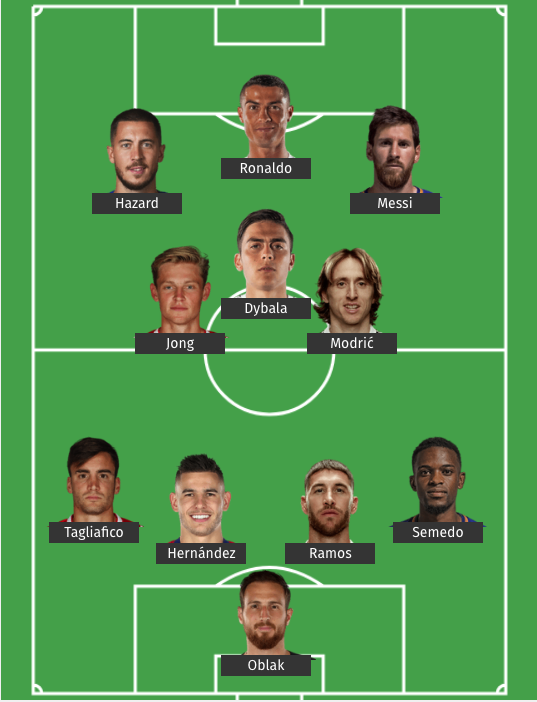

In [47]:
#This is the dream team line up
path="/Users/vats/Downloads/dreamteam.PNG"
display(Image.open(path))

#### This is the team which the best team based on the quality or the attributes which are required for each position


### Inference
#### The analysis shows us that Dream Team is not equivalent to the highest rated team, this is because for each position there are certain attributes that are important. For instance, for a centerback, the position requires a player who has good positioning and defending skills to prevent scoring as supposed to a center forward whose focus is more on shooting accuracy. Therefore, the Dream Team is made according to the most important features for each position and not the rating per player.

## Analysis 6 - Value and Potential

### How is the value of the player affected by his potential?

#### Let's find the clubs with the highest potential and most valuable teams and see if there are any correlations to it

In [48]:
#Most valuable teams
df.groupby(by=df['Club'])['Value'].agg(sum).sort_values(ascending=False).head()

Club
FC Barcelona           968500000.0
Real Madrid            935580000.0
Paris Saint-Germain    854620000.0
Manchester City        851315000.0
Juventus               798775000.0
Name: Value, dtype: float64

In [49]:
#Clubs with the highest mean potential 
df.groupby(by=df['Club'])['Potential'].agg('mean').sort_values(ascending=False).head()

Club
FC Barcelona           86.000000
Real Madrid            85.073171
FC Bayern München      84.928571
Juventus               84.222222
Paris Saint-Germain    82.931818
Name: Potential, dtype: float64

#### The above analysis shows that the highest potential teams are also the most valuable teams, so there has to be some kind of relation between the two terms.
#### Potential decides what overall a player will be able to reach after a few seasons, although players can, of course, exceed or fall short of this target. You can get an idea of a player's potential through little remarks on their scout report.
#### "Showing great potential" means a player has potential of 80-84; "an exciting prospect" means a player has potential of 85-89; and "has the potential to be special" means a player has potential of 90 plus.
#### We decided to select potential as the independent variable to check how much does the future rating of a player(ie potential) affect the value of a player if any, let's further examine that using a regression model 

### Let's create a  regression model created to analyze how the value of a player is affected by the potential of a player

In [50]:
col=['Potential']
X = df[col]
X = sm.add_constant(X)
y = df['Value']

/Users/vats/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [51]:
pd.concat([X, y], axis=1).head(10)

const  Potential       Value
0    1.0         84  17500000.0
1    1.0         88  60000000.0
2    1.0         84  10500000.0
3    1.0         83   1500000.0
4    1.0         89  13500000.0
5    1.0         87  17000000.0
6    1.0         88  19500000.0
7    1.0         87  21000000.0
8    1.0         87  11000000.0
9    1.0         88  12000000.0

In [52]:
model = sm.OLS(endog=y, exog=X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     8865.
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:08:25   Log-Likelihood:            -3.2971e+05
No. Observations:               19650   AIC:                         6.594e+05
Df Residuals:                   19648   BIC:                         6.594e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.276e+07   3.75e+05    -87.394      0.000   -3.35e+07    -3.2e+07
Potential   4.908e+05   5212.814     94.152      0.000    4.81e+05    5.01e+05
==============================================================================
Omnibus:                    23462.720   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4276178.809
Skew:                           6.255   Prob(JB):                         0.00
Kurtosis:                      74.178   Cond. No.                         806.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inference
#### This analysis shows us that on average an increase in 1 unit of potential for a player,his value increases by 479,500 when all other factors are constant. Thus, we can conclude there is a high positive correlation between potential and value.
#### The more expensive option for a winger is the aforementioned Jadon Sancho. The Borussia Dortmund man starts off at a much higher rating of 78 and also has an exceptional potential of 90 overall. On top of that, his in-game stats are excellent with five-star skills complemented by 88 acceleration, 87 sprint speed, 90 agility and 87 dribbling. Despite all this, Sancho is still relatively affordable with a starting transfer value of around £17m. If you have the extra budget, he is well worth picking up.

## Analysis 7 -  Choropleth map without using geopandas :
    
#### Plotting graphs offline within Jupyter Notebook Environment

### Which are the most lethal countries in the game?

#### Here the focus shifts to showcasing visualization skill set and generate a world map with each country's overall rating (based on player features) highlighted.

In [53]:
# different set of packages have to be installed and imported for this map
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected = True) #initiate Plotly notebook mode
import plotly.graph_objs as go

In [54]:
overall = pd.DataFrame(df.groupby(['Country'])['Overall'].mean().reset_index())
count = pd.DataFrame(overall.groupby('Country')['Overall'].mean().reset_index())
#this count dataframe has countrywise mean overall value (considered overall of every player for a country and then computed mean)

In [55]:
trace = [go.Choropleth(
            colorscale = 'YlGnBu',
            locationmode = 'country names',
            locations = count['Country'],
            text = count['Country'],
            z = count['Overall'],
)]

layout = go.Layout(title = 'Country vs Mean Overall Rating')

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)

### Inference
#### This map is interactive in nature and when we hover over any particular region, it displays the mean overall value(all player features included) along with the country's name. Due to this clean visualization, it is evident that regions with dark blue color have a higher overall value and as the shade moves towards yellow , there is a decrease observed in overall value.

#### Bottom line is that we can point out national teams with good quality players and even compare a country's standing with respect to others.

### Conclusion of the above analysis
#### 1) We wanted to analyze the physical attributes and how they affect the rating of a player

#### 2) We analyzed the age gap between players and loyalty of players

#### 3) We found the distribution of players in each position and made inferences

#### 4) There was a relation between the wage and value of players

#### 5) We found a difference between the highest rated players and the dream team

#### 6) We observed the value of the player being affected by his potential

#### 7) We mapped the countries of players, with their mean rating to find out the most lethal countries

## Final Conclusion 
#### For this project, we were able to gather several analyses and generate visualizations from sofifa.com. FIFA statistics help provide analyses such as players' stats and demographics, team rankings, and an overview of the football industry as a whole. The data used can  not only just capture individual as well as team statistics, yet when reviewed later the data helps highlight strengths, weaknesses, scout talent, and keep records of progess made over time. Statistics can also help coaches measure the effectiveness of their practice sessions and plans for future sessions to improve to development of team. 
#### Overall, in terms of our dataset, the FIFA statistics used will allowed us to gauge a better understanding of player information. From our analyses we were able to understand correlations between player demographics, assess player loyalty and team retention rates, assess players' posiitoning and skills needed to complie the ideal Dream Team , and lastly were able to create visualizations to map the ratings of players across the globe. Compiling these analyses overall led to a better understanding of the football industry to analyze the player's skills and positioning individually and across teams as well. After completing this project, we have developed essential python skills with scraping and cleaning data to generating a variety of visualizations. Not only did this help us improve essential skills for data science priniciples but also allowed us to create analyses based on real world data to the football industry in which we all have high interest. Although this project , required a lot of time and effort, our team DataKicks has effectively complied analyses on the data we have collected for player information in FIFA. 

## APPENDIX

# Choropleth map (Analysis Point 7) but using geopandas (not interactive)

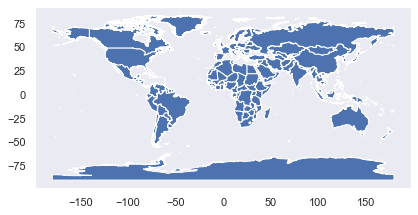

In [56]:
import geopandas
fp = '/Users/vats/Downloads/World_Countries/World_Countries.shp'
geo_df = geopandas.read_file(fp) # this dataframe is GEOdataframe and not a normal dataframe 
geo_df.plot()

In [57]:
# join our dataframe named count defined in analysis point 7 with geodataframe obtained above
merged = geo_df.set_index('COUNTRY').join(count.set_index('Country'))

/Users/vats/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning:

invalid value encountered in less



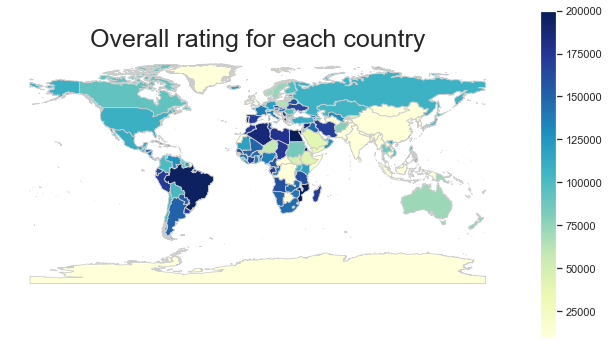

In [58]:
variable = "Overall" # column to visualize on the choropleth map generated
vmin, vmax = 10000,200000
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis("off")
ax.set_title('Overall rating for each country', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax)) #colorbar that you see on the right as a legend to the map
sm._A = []
cbar = fig.colorbar(sm)
merged.plot(column=variable, cmap="YlGnBu", linewidth=0.8, ax=ax, edgecolor="0.8")

# END